# BingLiu 

In [104]:
#import nltk
import nltk
nltk.download("opinion_lexicon")

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\tuhon\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [105]:
#import Bing Liu's dictionary
from nltk.corpus import opinion_lexicon

In [106]:
import pandas as pd

df = pd.read_csv('Final Red Bull\'s reviews.csv')
df

,Unnamed: 0,product,date,rating,title,reviews
0,0,Amazon.com: Customer reviews: Red Bull Energy ...,"April 17, 2024",5.0 out of 5 stars,Great multipack,Tastes delicious gives me more energy than coffee
1,1,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",1.0 out of 5 stars,"damaged, opened","packaging was open, and box was damaged, drink..."
2,2,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",3.0 out of 5 stars,Taste Seemed Off,These tasted like they were a reject batch. Th...
3,3,Amazon.com: Customer reviews: Red Bull Energy ...,"April 14, 2024",5.0 out of 5 stars,Energizing Without the Sugar Rush,Surviving with a new dietary restriction can b...
4,4,Amazon.com: Customer reviews: Red Bull Energy ...,"April 13, 2024",5.0 out of 5 stars,My son likes them.,My son likes them. He has been drinking them f...
...,...,...,...,...,...,...
495,495,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 9, 2023",5.0 out of 5 stars,Good deal,"Watermelon red bull is delicious, purchased th..."
496,496,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 8, 2023",5.0 out of 5 stars,Love this flavor Red Bulls. .,Not bad pricing either.
497,497,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 5, 2023",5.0 out of 5 stars,Awesome taste. Fantastic company & price,Delivery was perfect. Thanks Red Bull!! Cans p...
498,498,Amazon.com: Customer reviews: Red Bull Red Edi...,"February 25, 2023",5.0 out of 5 stars,Jolly rancher,Jolly rancher flavor that tastes like a real w...


In [107]:
df['title']=df['title'].str.lower()
df['reviews']=df['reviews'].str.lower()


In [108]:
# Convert 'title' and 'reviews' to string, replace NaN with empty strings
df['title'] = df['title'].fillna('').astype(str)
df['reviews'] = df['reviews'].fillna('').astype(str)

# Combine 'title' and 'reviews' into one column and convert to lowercase
df['combined'] = df['title'].str.cat(df['reviews'], sep=' ').str.lower()


In [114]:
df['rating']= df['rating'].apply(lambda x: float(x.split()[0]))
df['rating']

0      5.0
1      1.0
2      3.0
3      5.0
4      5.0
      ... 
495    5.0
496    5.0
497    5.0
498    5.0
499    5.0
Name: rating, Length: 500, dtype: float64

In [116]:
#df = df.drop(columns=['rating_number'])
def encode_sentiment(rating):
    if rating >= 4.0:
        return 1
    else:
        return 0

df['sentiment']=df['rating'].apply(encode_sentiment)
df
    

,Unnamed: 0,product,date,rating,title,reviews,combined,poscnt_BL,negcnt_BL,netcnt_BL,BingLiu_Sentiment,sentiment
0,0,Amazon.com: Customer reviews: Red Bull Energy ...,"April 17, 2024",5.0,great multipack,tastes delicious gives me more energy than coffee,great multipack tastes delicious gives me more...,2,0,2,1,1
1,1,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",1.0,"damaged, opened","packaging was open, and box was damaged, drink...","damaged, opened packaging was open, and box wa...",4,4,0,1,0
2,2,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",3.0,taste seemed off,these tasted like they were a reject batch. th...,taste seemed off these tasted like they were a...,3,4,-1,0,0
3,3,Amazon.com: Customer reviews: Red Bull Energy ...,"April 14, 2024",5.0,energizing without the sugar rush,surviving with a new dietary restriction can b...,energizing without the sugar rush surviving wi...,25,29,-4,0,1
4,4,Amazon.com: Customer reviews: Red Bull Energy ...,"April 13, 2024",5.0,my son likes them.,my son likes them. he has been drinking them f...,my son likes them. my son likes them. he has b...,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 9, 2023",5.0,good deal,"watermelon red bull is delicious, purchased th...","good deal watermelon red bull is delicious, pu...",6,2,4,1,1
496,496,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 8, 2023",5.0,love this flavor red bulls. .,not bad pricing either.,love this flavor red bulls. . not bad pricing ...,1,1,0,1,1
497,497,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 5, 2023",5.0,awesome taste. fantastic company & price,delivery was perfect. thanks red bull!! cans p...,awesome taste. fantastic company & price deliv...,8,2,6,1,1
498,498,Amazon.com: Customer reviews: Red Bull Red Edi...,"February 25, 2023",5.0,jolly rancher,jolly rancher flavor that tastes like a real w...,jolly rancher jolly rancher flavor that tastes...,4,0,4,1,1


In [117]:
def count_pos_neg(df, positive_dict, negative_dict):
    poscnt = []
    negcnt = []
    netcnt = []

    for nrow in range(len(df)):
        text = df[nrow]
        
        qa = 0
        qb = 0
        
        for word in positive_dict:
            if (word in text):
                qa = qa + 1
        for word in negative_dict:
            if (word in text):
                qb = qb + 1
        qc = qa - qb
        
        poscnt.append(qa)
        negcnt.append(qb)
        netcnt.append(qc)
    return(poscnt, negcnt, netcnt)

In [118]:
pos_list_BL = set(opinion_lexicon.positive())
neg_list_BL = set(opinion_lexicon.negative())

df['poscnt_BL'], df['negcnt_BL'], df['netcnt_BL'] = count_pos_neg(df['combined'].str.lower(), pos_list_BL, neg_list_BL)


def bing_liu_sentiment(row):
    if row['poscnt_BL'] >= 1 and row['poscnt_BL'] >= row['negcnt_BL']:
        return 1  # Positive sentiment
    elif row['poscnt_BL'] >= 1 and row['poscnt_BL'] < row['negcnt_BL']:
        return 0
    elif row['poscnt_BL'] < 1 and row['poscnt_BL'] <= row['negcnt_BL']:
        return 0 # Negative sentiment
    elif row['poscnt_BL'] <= 1 and row['poscnt_BL'] < row['negcnt_BL']:
        return 0

# Correctly apply the sentiment analysis function to each row.
df['BingLiu_Sentiment'] = df.apply(bing_liu_sentiment, axis=1)

df['poscnt_BL'], df['negcnt_BL'], df['netcnt_BL'] = count_pos_neg(df['combined'], pos_list_BL, neg_list_BL)

df 


,Unnamed: 0,product,date,rating,title,reviews,combined,poscnt_BL,negcnt_BL,netcnt_BL,BingLiu_Sentiment,sentiment
0,0,Amazon.com: Customer reviews: Red Bull Energy ...,"April 17, 2024",5.0,great multipack,tastes delicious gives me more energy than coffee,great multipack tastes delicious gives me more...,2,0,2,1,1
1,1,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",1.0,"damaged, opened","packaging was open, and box was damaged, drink...","damaged, opened packaging was open, and box wa...",4,4,0,1,0
2,2,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",3.0,taste seemed off,these tasted like they were a reject batch. th...,taste seemed off these tasted like they were a...,3,4,-1,0,0
3,3,Amazon.com: Customer reviews: Red Bull Energy ...,"April 14, 2024",5.0,energizing without the sugar rush,surviving with a new dietary restriction can b...,energizing without the sugar rush surviving wi...,25,29,-4,0,1
4,4,Amazon.com: Customer reviews: Red Bull Energy ...,"April 13, 2024",5.0,my son likes them.,my son likes them. he has been drinking them f...,my son likes them. my son likes them. he has b...,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 9, 2023",5.0,good deal,"watermelon red bull is delicious, purchased th...","good deal watermelon red bull is delicious, pu...",6,2,4,1,1
496,496,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 8, 2023",5.0,love this flavor red bulls. .,not bad pricing either.,love this flavor red bulls. . not bad pricing ...,1,1,0,1,1
497,497,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 5, 2023",5.0,awesome taste. fantastic company & price,delivery was perfect. thanks red bull!! cans p...,awesome taste. fantastic company & price deliv...,8,2,6,1,1
498,498,Amazon.com: Customer reviews: Red Bull Red Edi...,"February 25, 2023",5.0,jolly rancher,jolly rancher flavor that tastes like a real w...,jolly rancher jolly rancher flavor that tastes...,4,0,4,1,1


In [119]:
df['sentiment'].value_counts()

sentiment
1    382
0    118
Name: count, dtype: int64

In [120]:
df['BingLiu_Sentiment'].value_counts()

BingLiu_Sentiment
1    320
0    180
Name: count, dtype: int64

In [121]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

report = classification_report(df['sentiment'], df['BingLiu_Sentiment'], target_names=['Negative', 'Positive'], output_dict=False)
print(report)

              precision    recall  f1-score   support

    Negative       0.52      0.79      0.62       118
    Positive       0.92      0.77      0.84       382

    accuracy                           0.78       500
   macro avg       0.72      0.78      0.73       500
weighted avg       0.83      0.78      0.79       500



In [122]:
precision, recall, f1, _ = precision_recall_fscore_support(df['sentiment'], df['BingLiu_Sentiment'], average='weighted')
accuracy = accuracy_score(df['sentiment'], df['BingLiu_Sentiment'])

print("\nEvaluation Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")



Evaluation Metrics:
Precision: 0.83
Recall: 0.78
F1-Score: 0.79
Accuracy: 0.78


# LM

In [123]:
import pandas as pd 

df = pd.read_csv('Final Red Bull\'s reviews.csv')
df

,Unnamed: 0,product,date,rating,title,reviews
0,0,Amazon.com: Customer reviews: Red Bull Energy ...,"April 17, 2024",5.0 out of 5 stars,Great multipack,Tastes delicious gives me more energy than coffee
1,1,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",1.0 out of 5 stars,"damaged, opened","packaging was open, and box was damaged, drink..."
2,2,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",3.0 out of 5 stars,Taste Seemed Off,These tasted like they were a reject batch. Th...
3,3,Amazon.com: Customer reviews: Red Bull Energy ...,"April 14, 2024",5.0 out of 5 stars,Energizing Without the Sugar Rush,Surviving with a new dietary restriction can b...
4,4,Amazon.com: Customer reviews: Red Bull Energy ...,"April 13, 2024",5.0 out of 5 stars,My son likes them.,My son likes them. He has been drinking them f...
...,...,...,...,...,...,...
495,495,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 9, 2023",5.0 out of 5 stars,Good deal,"Watermelon red bull is delicious, purchased th..."
496,496,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 8, 2023",5.0 out of 5 stars,Love this flavor Red Bulls. .,Not bad pricing either.
497,497,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 5, 2023",5.0 out of 5 stars,Awesome taste. Fantastic company & price,Delivery was perfect. Thanks Red Bull!! Cans p...
498,498,Amazon.com: Customer reviews: Red Bull Red Edi...,"February 25, 2023",5.0 out of 5 stars,Jolly rancher,Jolly rancher flavor that tastes like a real w...


In [124]:
df['title']=df['title'].str.lower()
df['reviews']=df['reviews'].str.lower()


In [125]:
# Convert 'title' and 'reviews' to string, replace NaN with empty strings
df['title'] = df['title'].fillna('').astype(str)
df['reviews'] = df['reviews'].fillna('').astype(str)

# Combine 'title' and 'reviews' into one column and convert to lowercase
df['combined'] = df['title'].str.cat(df['reviews'], sep=' ').str.lower()


In [126]:
import pandas as pd

# Define function to read words from a file into a list
def read_local_dictionary(file):
    with open(file, "r") as f:
        return [line.strip().lower() for line in f]

# Define function to count positive and negative sentiments
def count_pos_neg(text, positive_dict, negative_dict):
    pos_count = sum(1 for word in positive_dict if word in text)
    neg_count = sum(1 for word in negative_dict if word in text)
    net_count = pos_count - neg_count
    return pos_count, neg_count, net_count

pos_list_LM = read_local_dictionary('positive-words-LM.txt')
neg_list_LM = read_local_dictionary('negative-words-LM.txt')

# Combine 'title' and 'reviews' columns into one text and lower case 
df['combined'] = df['title'].str.cat(df['reviews'], sep=' ').str.lower()

# Apply the count_pos_neg function
results = df['combined'].apply(lambda text: count_pos_neg(text, pos_list_LM, neg_list_LM))

# Split the results into separate DataFrame columns
df[['poscnt_LM', 'negcnt_LM', 'netcnt_LM']] = pd.DataFrame(results.tolist(), index=df.index)

def LM_sentiment(row):
    if row['poscnt_LM'] >= 1 and row['poscnt_LM'] >= row['negcnt_LM']:
        return 1  # Positive sentiment
    elif row['poscnt_LM'] >= 1 and row['poscnt_LM'] < row['negcnt_LM']:
        return 0
    elif row['poscnt_LM'] < 1 and row['poscnt_LM'] <= row['negcnt_LM']:
        return 0 # Negative sentiment
    elif row['poscnt_LM'] <= 1 and row['poscnt_LM'] < row['negcnt_LM']:
        return 0


df['LM_sentiment'] = df.apply(LM_sentiment, axis=1)

column_order = df.columns.tolist()

df = df[column_order]


In [127]:
df

,Unnamed: 0,product,date,rating,title,reviews,combined,poscnt_LM,negcnt_LM,netcnt_LM,LM_sentiment
0,0,Amazon.com: Customer reviews: Red Bull Energy ...,"April 17, 2024",5.0 out of 5 stars,great multipack,tastes delicious gives me more energy than coffee,great multipack tastes delicious gives me more...,1,0,1,1
1,1,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",1.0 out of 5 stars,"damaged, opened","packaging was open, and box was damaged, drink...","damaged, opened packaging was open, and box wa...",0,2,-2,0
2,2,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",3.0 out of 5 stars,taste seemed off,these tasted like they were a reject batch. th...,taste seemed off these tasted like they were a...,0,2,-2,0
3,3,Amazon.com: Customer reviews: Red Bull Energy ...,"April 14, 2024",5.0 out of 5 stars,energizing without the sugar rush,surviving with a new dietary restriction can b...,energizing without the sugar rush surviving wi...,6,6,0,1
4,4,Amazon.com: Customer reviews: Red Bull Energy ...,"April 13, 2024",5.0 out of 5 stars,my son likes them.,my son likes them. he has been drinking them f...,my son likes them. my son likes them. he has b...,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
495,495,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 9, 2023",5.0 out of 5 stars,good deal,"watermelon red bull is delicious, purchased th...","good deal watermelon red bull is delicious, pu...",3,0,3,1
496,496,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 8, 2023",5.0 out of 5 stars,love this flavor red bulls. .,not bad pricing either.,love this flavor red bulls. . not bad pricing ...,0,1,-1,0
497,497,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 5, 2023",5.0 out of 5 stars,awesome taste. fantastic company & price,delivery was perfect. thanks red bull!! cans p...,awesome taste. fantastic company & price deliv...,3,0,3,1
498,498,Amazon.com: Customer reviews: Red Bull Red Edi...,"February 25, 2023",5.0 out of 5 stars,jolly rancher,jolly rancher flavor that tastes like a real w...,jolly rancher jolly rancher flavor that tastes...,0,0,0,0


In [128]:
import re

# Normalize text data: lowercase, remove special characters, strip whitespace
df['reviews'] = df['reviews'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x).lower()).strip())

# Find duplicates
duplicates_mask = df['reviews'].duplicated(keep=False)
duplicate_reviews = df[duplicates_mask]
print(duplicate_reviews)


     Unnamed: 0                                            product  \
29           29  Amazon.com: Customer reviews: Red Bull Energy ...   
33           33  Amazon.com: Customer reviews: Red Bull Energy ...   
58           58  Amazon.com: Customer reviews: Red Bull Energy ...   
73           73  Amazon.com: Customer reviews: Red Bull Energy ...   
88           88  Amazon.com: Customer reviews: Red Bull Energy ...   
91           91  Amazon.com: Customer reviews: Red Bull Energy ...   
115         115  Amazon.com: Customer reviews: Red Bull Energy ...   
128         128  Amazon.com: Customer reviews: Red Bull Energy ...   
199         199  Amazon.com: Customer reviews: Red Bull Energy ...   
204         204  Amazon.com: Customer reviews: Red Bull Energy ...   
231         231  Amazon.com: Customer reviews: Red Bull Energy ...   
246         246  Amazon.com: Customer reviews: Red Bull Energy ...   
255         255  Amazon.com: Customer reviews: Red Bull Energy ...   
256         256  Ama

In [130]:
df['rating']= df['rating'].apply(lambda x: float(x.split()[0]))
df['rating']

0      5.0
1      1.0
2      3.0
3      5.0
4      5.0
      ... 
495    5.0
496    5.0
497    5.0
498    5.0
499    5.0
Name: rating, Length: 500, dtype: float64

In [131]:
#df = df.drop(columns=['rating_number'])
def encode_sentiment(rating):
    if rating >= 4.0:
        return 1
    else:
        return 0

df['sentiment']=df['rating'].apply(encode_sentiment)
df
    

,Unnamed: 0,product,date,rating,title,reviews,combined,poscnt_LM,negcnt_LM,netcnt_LM,LM_sentiment,sentiment
0,0,Amazon.com: Customer reviews: Red Bull Energy ...,"April 17, 2024",5.0,great multipack,tastes delicious gives me more energy than coffee,great multipack tastes delicious gives me more...,1,0,1,1,1
1,1,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",1.0,"damaged, opened",packaging was open and box was damaged drinks ...,"damaged, opened packaging was open, and box wa...",0,2,-2,0,0
2,2,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",3.0,taste seemed off,these tasted like they were a reject batch the...,taste seemed off these tasted like they were a...,0,2,-2,0,0
3,3,Amazon.com: Customer reviews: Red Bull Energy ...,"April 14, 2024",5.0,energizing without the sugar rush,surviving with a new dietary restriction can b...,energizing without the sugar rush surviving wi...,6,6,0,1,1
4,4,Amazon.com: Customer reviews: Red Bull Energy ...,"April 13, 2024",5.0,my son likes them.,my son likes them he has been drinking them fo...,my son likes them. my son likes them. he has b...,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 9, 2023",5.0,good deal,watermelon red bull is delicious purchased thi...,"good deal watermelon red bull is delicious, pu...",3,0,3,1,1
496,496,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 8, 2023",5.0,love this flavor red bulls. .,not bad pricing either,love this flavor red bulls. . not bad pricing ...,0,1,-1,0,1
497,497,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 5, 2023",5.0,awesome taste. fantastic company & price,delivery was perfect thanks red bull cans pack...,awesome taste. fantastic company & price deliv...,3,0,3,1,1
498,498,Amazon.com: Customer reviews: Red Bull Red Edi...,"February 25, 2023",5.0,jolly rancher,jolly rancher flavor that tastes like a real w...,jolly rancher jolly rancher flavor that tastes...,0,0,0,0,1


In [132]:

df

,Unnamed: 0,product,date,rating,title,reviews,combined,poscnt_LM,negcnt_LM,netcnt_LM,LM_sentiment,sentiment
0,0,Amazon.com: Customer reviews: Red Bull Energy ...,"April 17, 2024",5.0,great multipack,tastes delicious gives me more energy than coffee,great multipack tastes delicious gives me more...,1,0,1,1,1
1,1,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",1.0,"damaged, opened",packaging was open and box was damaged drinks ...,"damaged, opened packaging was open, and box wa...",0,2,-2,0,0
2,2,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",3.0,taste seemed off,these tasted like they were a reject batch the...,taste seemed off these tasted like they were a...,0,2,-2,0,0
3,3,Amazon.com: Customer reviews: Red Bull Energy ...,"April 14, 2024",5.0,energizing without the sugar rush,surviving with a new dietary restriction can b...,energizing without the sugar rush surviving wi...,6,6,0,1,1
4,4,Amazon.com: Customer reviews: Red Bull Energy ...,"April 13, 2024",5.0,my son likes them.,my son likes them he has been drinking them fo...,my son likes them. my son likes them. he has b...,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 9, 2023",5.0,good deal,watermelon red bull is delicious purchased thi...,"good deal watermelon red bull is delicious, pu...",3,0,3,1,1
496,496,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 8, 2023",5.0,love this flavor red bulls. .,not bad pricing either,love this flavor red bulls. . not bad pricing ...,0,1,-1,0,1
497,497,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 5, 2023",5.0,awesome taste. fantastic company & price,delivery was perfect thanks red bull cans pack...,awesome taste. fantastic company & price deliv...,3,0,3,1,1
498,498,Amazon.com: Customer reviews: Red Bull Red Edi...,"February 25, 2023",5.0,jolly rancher,jolly rancher flavor that tastes like a real w...,jolly rancher jolly rancher flavor that tastes...,0,0,0,0,1


In [133]:
df['sentiment'].value_counts()


sentiment
1    382
0    118
Name: count, dtype: int64

In [134]:
df['LM_sentiment'].value_counts()


LM_sentiment
1    273
0    227
Name: count, dtype: int64

In [135]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

report = classification_report(df['sentiment'], df['LM_sentiment'], target_names=['Negative', 'Positive'], output_dict=False)
print(report)

              precision    recall  f1-score   support

    Negative       0.44      0.85      0.58       118
    Positive       0.93      0.67      0.78       382

    accuracy                           0.71       500
   macro avg       0.69      0.76      0.68       500
weighted avg       0.82      0.71      0.73       500



In [136]:
precision, recall, f1, _ = precision_recall_fscore_support(df['sentiment'], df['LM_sentiment'], average='weighted')

accuracy = accuracy_score(df['sentiment'], df['LM_sentiment'])

print("\nEvaluation Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")



Evaluation Metrics:
Precision: 0.82
Recall: 0.71
F1-Score: 0.73
Accuracy: 0.71


In [137]:
!pip install scikit-learn


In [139]:
df[['combined','poscnt_LM','negcnt_LM','netcnt_LM']].head(5)

,combined,poscnt_LM,negcnt_LM,netcnt_LM
0,great multipack tastes delicious gives me more...,1,0,1
1,"damaged, opened packaging was open, and box wa...",0,2,-2
2,taste seemed off these tasted like they were a...,0,2,-2
3,energizing without the sugar rush surviving wi...,6,6,0
4,my son likes them. my son likes them. he has b...,0,0,0


# TextBlob

In [140]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re

In [141]:
#pd.set_option('display.max_columns')# Show all columns
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tuhon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tuhon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tuhon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [142]:
# Define stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
#additional_stop_words = {'year', 'state', 'also', 'just', 'really', 'still', 'would'}
#stop_words.update(additional_stop_words)
lemmatizer = WordNetLemmatizer()

# Define a function for preprocessing
def preprocess_text(text):
    # Check if text is NaN
    if pd.isna(text):
        return ''
    
    # Remove numbers, months, and years
    text = re.sub(r'\d+', '', text)  # Remove numbers
    #text = re.sub(r'(January|February|March|April|May|June|July|August|September|October|November|December)', '', text, flags=re.IGNORECASE)  # Remove months
    text = re.sub(r'(19\d{2}|20\d{2})', '', text)  # Remove years

    # Tokenize the text
    tokens = word_tokenize(text)
    # Lemmatize and remove stopwords
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token.lower() not in stop_words]
    # Join the tokens back into a string
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

In [143]:
!pip install textblob

In [144]:
#import the package
from textblob import TextBlob

In [145]:
import nltk 
from nltk import sent_tokenize

In [146]:
import pandas as pd
from textblob import TextBlob

df = pd.read_csv('Final Red Bull\'s reviews.csv')
# Apply preprocessing to the 'Delay Description' column
df['title']=df['title'].apply(preprocess_text)
df['reviews'] = df['reviews'].apply(preprocess_text)

In [147]:
df['title']=df['title'].str.lower()
df['reviews']=df['reviews'].str.lower()


In [148]:
# Convert 'title' and 'reviews' to string, replace NaN with empty strings
df['title'] = df['title'].fillna('').astype(str)
df['reviews'] = df['reviews'].fillna('').astype(str)

# Combine 'title' and 'reviews' into one column and convert to lowercase
df['combined'] = df['title'].str.cat(df['reviews'], sep=' ').str.lower()


In [149]:
df['rating']= df['rating'].apply(lambda x: float(x.split()[0]))
df['rating']

0      5.0
1      1.0
2      3.0
3      5.0
4      5.0
      ... 
495    5.0
496    5.0
497    5.0
498    5.0
499    5.0
Name: rating, Length: 500, dtype: float64

In [150]:
df

,Unnamed: 0,product,date,rating,title,reviews,combined
0,0,Amazon.com: Customer reviews: Red Bull Energy ...,"April 17, 2024",5.0,great multipack,tastes delicious give energy coffee,great multipack tastes delicious give energy c...
1,1,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",1.0,damaged opened,packaging open box damaged drink falling packa...,damaged opened packaging open box damaged drin...
2,2,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",3.0,taste seemed,tasted like reject batch flavor full typical s...,taste seemed tasted like reject batch flavor f...
3,3,Amazon.com: Customer reviews: Red Bull Energy ...,"April 14, 2024",5.0,energizing without sugar rush,surviving new dietary restriction daunting red...,energizing without sugar rush surviving new di...
4,4,Amazon.com: Customer reviews: Red Bull Energy ...,"April 13, 2024",5.0,son like,son like drinking real long time,son like son like drinking real long time
...,...,...,...,...,...,...,...
495,495,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 9, 2023",5.0,good deal,watermelon red bull delicious purchased enjoye...,good deal watermelon red bull delicious purcha...
496,496,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 8, 2023",5.0,love flavor red bulls,bad pricing either,love flavor red bulls bad pricing either
497,497,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 5, 2023",5.0,awesome taste fantastic company price,delivery perfect thanks red bull cans packed t...,awesome taste fantastic company price delivery...
498,498,Amazon.com: Customer reviews: Red Bull Red Edi...,"February 25, 2023",5.0,jolly rancher,jolly rancher flavor taste like real watermelo...,jolly rancher jolly rancher flavor taste like ...


In [151]:
#df = df.drop(columns=['rating_number'])
def encode_sentiment(rating):
    if rating >= 4.0:
        return 1
    else:
        return 0

df['sentiment']=df['rating'].apply(encode_sentiment)
df
    

,Unnamed: 0,product,date,rating,title,reviews,combined,sentiment
0,0,Amazon.com: Customer reviews: Red Bull Energy ...,"April 17, 2024",5.0,great multipack,tastes delicious give energy coffee,great multipack tastes delicious give energy c...,1
1,1,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",1.0,damaged opened,packaging open box damaged drink falling packa...,damaged opened packaging open box damaged drin...,0
2,2,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",3.0,taste seemed,tasted like reject batch flavor full typical s...,taste seemed tasted like reject batch flavor f...,0
3,3,Amazon.com: Customer reviews: Red Bull Energy ...,"April 14, 2024",5.0,energizing without sugar rush,surviving new dietary restriction daunting red...,energizing without sugar rush surviving new di...,1
4,4,Amazon.com: Customer reviews: Red Bull Energy ...,"April 13, 2024",5.0,son like,son like drinking real long time,son like son like drinking real long time,1
...,...,...,...,...,...,...,...,...
495,495,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 9, 2023",5.0,good deal,watermelon red bull delicious purchased enjoye...,good deal watermelon red bull delicious purcha...,1
496,496,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 8, 2023",5.0,love flavor red bulls,bad pricing either,love flavor red bulls bad pricing either,1
497,497,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 5, 2023",5.0,awesome taste fantastic company price,delivery perfect thanks red bull cans packed t...,awesome taste fantastic company price delivery...,1
498,498,Amazon.com: Customer reviews: Red Bull Red Edi...,"February 25, 2023",5.0,jolly rancher,jolly rancher flavor taste like real watermelo...,jolly rancher jolly rancher flavor taste like ...,1


In [152]:
#df = df.drop(columns =['TextBlob score'])

df['polarity'] = df['combined'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)
#df['subjectivity'] = df['combined'].apply(lambda text: TextBlob(str(text)).sentiment.subjectivity)

# Define function to classify TextBlob sentiment
def classify_textblob_sentiment(text, positive_threshold=0.1, negative_threshold=-0.1):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > positive_threshold:
        return 1  # Positive sentimente:
    elif analysis.sentiment.polarity == positive_threshold and analysis.sentiment.polarity == negative_threshold:
        return 1
    else:
        return 0  

df['TextBlob_Sentiment'] = df['combined'].apply(classify_textblob_sentiment)

df["score_TextBlob"] = df["combined"].apply(lambda x: TextBlob(x).sentiment.polarity)

#df.head(20)
df

,Unnamed: 0,product,date,rating,title,reviews,combined,sentiment,polarity,TextBlob_Sentiment,score_TextBlob
0,0,Amazon.com: Customer reviews: Red Bull Energy ...,"April 17, 2024",5.0,great multipack,tastes delicious give energy coffee,great multipack tastes delicious give energy c...,1,0.900000,1,0.900000
1,1,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",1.0,damaged opened,packaging open box damaged drink falling packa...,damaged opened packaging open box damaged drin...,0,0.208333,1,0.208333
2,2,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",3.0,taste seemed,tasted like reject batch flavor full typical s...,taste seemed tasted like reject batch flavor f...,0,-0.061111,0,-0.061111
3,3,Amazon.com: Customer reviews: Red Bull Energy ...,"April 14, 2024",5.0,energizing without sugar rush,surviving new dietary restriction daunting red...,energizing without sugar rush surviving new di...,1,0.121245,1,0.121245
4,4,Amazon.com: Customer reviews: Red Bull Energy ...,"April 13, 2024",5.0,son like,son like drinking real long time,son like son like drinking real long time,1,-0.075000,0,-0.075000
...,...,...,...,...,...,...,...,...,...,...,...
495,495,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 9, 2023",5.0,good deal,watermelon red bull delicious purchased enjoye...,good deal watermelon red bull delicious purcha...,1,0.440000,1,0.440000
496,496,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 8, 2023",5.0,love flavor red bulls,bad pricing either,love flavor red bulls bad pricing either,1,-0.066667,0,-0.066667
497,497,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 5, 2023",5.0,awesome taste fantastic company price,delivery perfect thanks red bull cans packed t...,awesome taste fantastic company price delivery...,1,0.437500,1,0.437500
498,498,Amazon.com: Customer reviews: Red Bull Red Edi...,"February 25, 2023",5.0,jolly rancher,jolly rancher flavor taste like real watermelo...,jolly rancher jolly rancher flavor taste like ...,1,0.177143,1,0.177143


In [153]:
df['TextBlob_Sentiment'].value_counts()


TextBlob_Sentiment
1    331
0    169
Name: count, dtype: int64

In [154]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

report = classification_report(df['sentiment'], df['TextBlob_Sentiment'], target_names=['Negative', 'Positive'], output_dict=False)
print(report)

              precision    recall  f1-score   support

    Negative       0.55      0.79      0.65       118
    Positive       0.92      0.80      0.86       382

    accuracy                           0.80       500
   macro avg       0.74      0.79      0.75       500
weighted avg       0.84      0.80      0.81       500



In [155]:
precision, recall, f1, _ = precision_recall_fscore_support(df['sentiment'], df['TextBlob_Sentiment'], average='weighted')
accuracy = accuracy_score(df['sentiment'], df['TextBlob_Sentiment'])

print("\nEvaluation Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")



Evaluation Metrics:
Precision: 0.84
Recall: 0.80
F1-Score: 0.81
Accuracy: 0.80


# Vader 

In [156]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re

In [157]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tuhon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tuhon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tuhon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [158]:
# Define stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
#additional_stop_words = {'year', 'state', 'also', 'just', 'really', 'still', 'would'}  
#stop_words.update(additional_stop_words)
lemmatizer = WordNetLemmatizer()

# Define a function for preprocessing
def preprocess_text(text):
    # Check if text is NaN
    if pd.isna(text):
        return ''
    
    # Remove numbers, months, and years
    text = re.sub(r'\d+', '', text)  # Remove numbers
    #text = re.sub(r'(January|February|March|April|May|June|July|August|September|October|November|December)', '', text, flags=re.IGNORECASE)  # Remove months
    text = re.sub(r'(19\d{2}|20\d{2})', '', text)  # Remove years

    # Tokenize the text
    tokens = word_tokenize(text)
    # Lemmatize and remove stopwords
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token.lower() not in stop_words]
    # Join the tokens back into a string
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

In [159]:
df = pd.read_csv('Final Red Bull\'s reviews.csv')
# Apply preprocessing to the 'Delay Description' column
df['title']=df['title'].apply(preprocess_text)
df['reviews'] = df['reviews'].apply(preprocess_text)

In [160]:
!pip install vadersentiment

In [161]:
#import vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [162]:
#df = pd.read_csv('Final Red Bull\'s reviews.csv')
analyzer = SentimentIntensityAnalyzer()
scores = [analyzer.polarity_scores(sentence) for sentence in df]

In [163]:
df['title']=df['title'].str.lower()
df['reviews']=df['reviews'].str.lower()


In [164]:
# Convert 'title' and 'reviews' to string, replace NaN with empty strings
df['title'] = df['title'].fillna('').astype(str)
df['reviews'] = df['reviews'].fillna('').astype(str)

# Combine 'title' and 'reviews' into one column and convert to lowercase
df['combined'] = df['title'].str.cat(df['reviews'], sep=' ').str.lower()


In [165]:
df['rating']= df['rating'].apply(lambda x: float(x.split()[0]))
df['rating']

0      5.0
1      1.0
2      3.0
3      5.0
4      5.0
      ... 
495    5.0
496    5.0
497    5.0
498    5.0
499    5.0
Name: rating, Length: 500, dtype: float64

In [166]:
df

,Unnamed: 0,product,date,rating,title,reviews,combined
0,0,Amazon.com: Customer reviews: Red Bull Energy ...,"April 17, 2024",5.0,great multipack,tastes delicious give energy coffee,great multipack tastes delicious give energy c...
1,1,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",1.0,damaged opened,packaging open box damaged drink falling packa...,damaged opened packaging open box damaged drin...
2,2,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",3.0,taste seemed,tasted like reject batch flavor full typical s...,taste seemed tasted like reject batch flavor f...
3,3,Amazon.com: Customer reviews: Red Bull Energy ...,"April 14, 2024",5.0,energizing without sugar rush,surviving new dietary restriction daunting red...,energizing without sugar rush surviving new di...
4,4,Amazon.com: Customer reviews: Red Bull Energy ...,"April 13, 2024",5.0,son like,son like drinking real long time,son like son like drinking real long time
...,...,...,...,...,...,...,...
495,495,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 9, 2023",5.0,good deal,watermelon red bull delicious purchased enjoye...,good deal watermelon red bull delicious purcha...
496,496,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 8, 2023",5.0,love flavor red bulls,bad pricing either,love flavor red bulls bad pricing either
497,497,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 5, 2023",5.0,awesome taste fantastic company price,delivery perfect thanks red bull cans packed t...,awesome taste fantastic company price delivery...
498,498,Amazon.com: Customer reviews: Red Bull Red Edi...,"February 25, 2023",5.0,jolly rancher,jolly rancher flavor taste like real watermelo...,jolly rancher jolly rancher flavor taste like ...


In [167]:
#df = df.drop(columns=['rating_number'])
def encode_sentiment(rating):
    if rating >= 4.0:
        return 1
    else:
        return 0

df['sentiment']=df['rating'].apply(encode_sentiment)
df
    

,Unnamed: 0,product,date,rating,title,reviews,combined,sentiment
0,0,Amazon.com: Customer reviews: Red Bull Energy ...,"April 17, 2024",5.0,great multipack,tastes delicious give energy coffee,great multipack tastes delicious give energy c...,1
1,1,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",1.0,damaged opened,packaging open box damaged drink falling packa...,damaged opened packaging open box damaged drin...,0
2,2,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",3.0,taste seemed,tasted like reject batch flavor full typical s...,taste seemed tasted like reject batch flavor f...,0
3,3,Amazon.com: Customer reviews: Red Bull Energy ...,"April 14, 2024",5.0,energizing without sugar rush,surviving new dietary restriction daunting red...,energizing without sugar rush surviving new di...,1
4,4,Amazon.com: Customer reviews: Red Bull Energy ...,"April 13, 2024",5.0,son like,son like drinking real long time,son like son like drinking real long time,1
...,...,...,...,...,...,...,...,...
495,495,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 9, 2023",5.0,good deal,watermelon red bull delicious purchased enjoye...,good deal watermelon red bull delicious purcha...,1
496,496,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 8, 2023",5.0,love flavor red bulls,bad pricing either,love flavor red bulls bad pricing either,1
497,497,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 5, 2023",5.0,awesome taste fantastic company price,delivery perfect thanks red bull cans packed t...,awesome taste fantastic company price delivery...,1
498,498,Amazon.com: Customer reviews: Red Bull Red Edi...,"February 25, 2023",5.0,jolly rancher,jolly rancher flavor taste like real watermelo...,jolly rancher jolly rancher flavor taste like ...,1


In [168]:
df['sentiment'].value_counts()

sentiment
1    382
0    118
Name: count, dtype: int64

In [169]:
neg_s = [i["neg"] for i in scores]
neu_s = [i["neu"] for i in scores]
pos_s = [i["pos"] for i in scores]
compound_s = [i["compound"] for i in scores]

In [170]:
#df['reviews'] = df['reviews'].str.join(' ') 

df['vader_scores'] = df['combined'].apply(lambda x: analyzer.polarity_scores(x))

df['negscore_Vader'] = df['vader_scores'].apply(lambda x: x['neg'])
df['neuscore_Vader'] = df['vader_scores'].apply(lambda x: x['neu'])
df['posscore_Vader'] = df['vader_scores'].apply(lambda x: x['pos'])
df['compound_Vader'] = df['vader_scores'].apply(lambda x: x['compound'])

# Define a function that classifies sentiments based on the compound score
def classify_vader_sentiment(row, threshold=0.05):
    if row['compound_Vader'] >= threshold:
        return 1  # Positive sentiment
    else: 
        return 0  # Negative sentiment
    
# Drop the intermediate vader_scores column
#df.drop('vader_scores', axis=1, inplace=True)

#vader_textblob_df = df[['product', 'rating', 'title', 'reviews', 'combined', 'polarity', 'subjectivity','negscore_Vader', 'neuscore_Vader', 'posscore_Vader', 'compound_Vader']]
df['Vader_Sentiment'] = df.apply(classify_vader_sentiment, axis=1)
df



,Unnamed: 0,product,date,rating,title,reviews,combined,sentiment,vader_scores,negscore_Vader,neuscore_Vader,posscore_Vader,compound_Vader,Vader_Sentiment
0,0,Amazon.com: Customer reviews: Red Bull Energy ...,"April 17, 2024",5.0,great multipack,tastes delicious give energy coffee,great multipack tastes delicious give energy c...,1,"{'neg': 0.0, 'neu': 0.288, 'pos': 0.712, 'comp...",0.000,0.288,0.712,0.8720,1
1,1,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",1.0,damaged opened,packaging open box damaged drink falling packa...,damaged opened packaging open box damaged drin...,0,"{'neg': 0.41, 'neu': 0.518, 'pos': 0.072, 'com...",0.410,0.518,0.072,-0.8176,0
2,2,Amazon.com: Customer reviews: Red Bull Energy ...,"April 16, 2024",3.0,taste seemed,tasted like reject batch flavor full typical s...,taste seemed tasted like reject batch flavor f...,0,"{'neg': 0.236, 'neu': 0.548, 'pos': 0.216, 'co...",0.236,0.548,0.216,-0.1779,0
3,3,Amazon.com: Customer reviews: Red Bull Energy ...,"April 14, 2024",5.0,energizing without sugar rush,surviving new dietary restriction daunting red...,energizing without sugar rush surviving new di...,1,"{'neg': 0.045, 'neu': 0.678, 'pos': 0.277, 'co...",0.045,0.678,0.277,0.9903,1
4,4,Amazon.com: Customer reviews: Red Bull Energy ...,"April 13, 2024",5.0,son like,son like drinking real long time,son like son like drinking real long time,1,"{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'comp...",0.000,0.545,0.455,0.6124,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 9, 2023",5.0,good deal,watermelon red bull delicious purchased enjoye...,good deal watermelon red bull delicious purcha...,1,"{'neg': 0.0, 'neu': 0.429, 'pos': 0.571, 'comp...",0.000,0.429,0.571,0.9001,1
496,496,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 8, 2023",5.0,love flavor red bulls,bad pricing either,love flavor red bulls bad pricing either,1,"{'neg': 0.276, 'neu': 0.394, 'pos': 0.331, 'co...",0.276,0.394,0.331,0.1779,1
497,497,Amazon.com: Customer reviews: Red Bull Red Edi...,"March 5, 2023",5.0,awesome taste fantastic company price,delivery perfect thanks red bull cans packed t...,awesome taste fantastic company price delivery...,1,"{'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'comp...",0.000,0.377,0.623,0.9786,1
498,498,Amazon.com: Customer reviews: Red Bull Red Edi...,"February 25, 2023",5.0,jolly rancher,jolly rancher flavor taste like real watermelo...,jolly rancher jolly rancher flavor taste like ...,1,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.000,0.625,0.375,0.8860,1


In [171]:
# Create a column for positive compound scores
df['positive_compound'] = df['compound_Vader'].apply(lambda x: x if x > 0 else None)

# Create a column for negative compound scores
df['negative_compound'] = df['compound_Vader'].apply(lambda x: x if x <= 0 else None)

# Display the DataFrame to verify the new columns
df[['compound_Vader', 'positive_compound', 'negative_compound']]


,compound_Vader,positive_compound,negative_compound
0,0.8720,0.8720,NaN
1,-0.8176,NaN,-0.8176
2,-0.1779,NaN,-0.1779
3,0.9903,0.9903,NaN
4,0.6124,0.6124,NaN
...,...,...,...
495,0.9001,0.9001,NaN
496,0.1779,0.1779,NaN
497,0.9786,0.9786,NaN
498,0.8860,0.8860,NaN


In [172]:
df['date'] = pd.to_datetime(df['date'])
df['month_year'] = df['date'].dt.strftime('%B %Y')

df[['date', 'month_year']]


,date,month_year
0,2024-04-17,April 2024
1,2024-04-16,April 2024
2,2024-04-16,April 2024
3,2024-04-14,April 2024
4,2024-04-13,April 2024
...,...,...
495,2023-03-09,March 2023
496,2023-03-08,March 2023
497,2023-03-05,March 2023
498,2023-02-25,February 2023


In [21]:
df.to_csv('RedBULL_vader.csv')

In [173]:
df['Vader_Sentiment'].value_counts()


Vader_Sentiment
1    379
0    121
Name: count, dtype: int64

In [174]:
df['date'] = pd.to_datetime(df['date'])


In [175]:
df['date']

0     2024-04-17
1     2024-04-16
2     2024-04-16
3     2024-04-14
4     2024-04-13
         ...    
495   2023-03-09
496   2023-03-08
497   2023-03-05
498   2023-02-25
499   2023-02-24
Name: date, Length: 500, dtype: datetime64[ns]

In [176]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

report = classification_report(df['sentiment'], df['Vader_Sentiment'], target_names=['Negative', 'Positive'], output_dict=False)
print(report)

              precision    recall  f1-score   support

    Negative       0.64      0.66      0.65       118
    Positive       0.89      0.89      0.89       382

    accuracy                           0.83       500
   macro avg       0.77      0.77      0.77       500
weighted avg       0.84      0.83      0.83       500



In [177]:
precision, recall, f1, _ = precision_recall_fscore_support(df['sentiment'], df['Vader_Sentiment'], average='weighted')
accuracy = accuracy_score(df['sentiment'], df['Vader_Sentiment'])

print("\nEvaluation Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")



Evaluation Metrics:
Precision: 0.84
Recall: 0.83
F1-Score: 0.83
Accuracy: 0.83


In [27]:
df.to_csv('Red Bull_vader.csv')

In [178]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


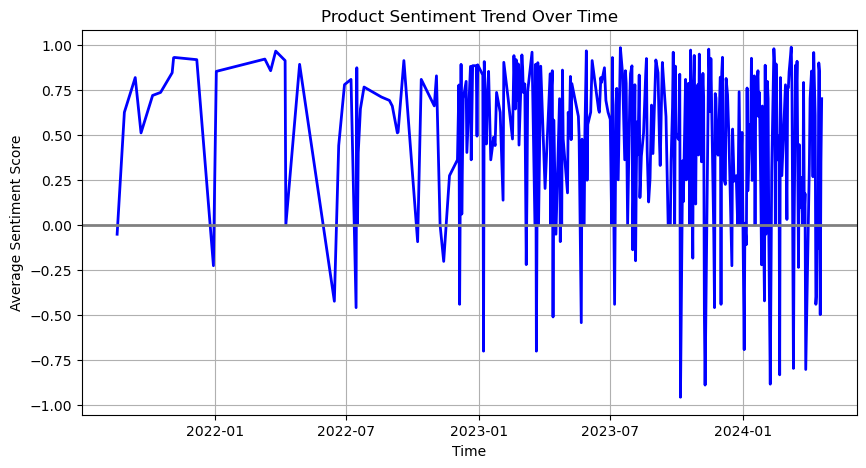

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df.sort_values('date', inplace=True)

# Aggregate the sentiment scores by date. 
df_aggregated = df.groupby('date')['compound_Vader'].mean().reset_index()

# Plot the trend line
plt.figure(figsize=(10, 5))
plt.plot(df_aggregated['date'], df_aggregated['compound_Vader'], marker='', color='blue', linewidth=2)

# Add a horizontal line at y=0
plt.axhline(0, color='gray', linewidth=2, linestyle='-')


# Set major ticks format and locator to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  

# Plot grid
plt.grid(True)

# Title and labels
plt.title('Product Sentiment Trend Over Time')
plt.xlabel('Time')
plt.ylabel('Average Sentiment Score')

# Save with a transparent background
plt.savefig('red bull trend over year.png', transparent=True, bbox_inches='tight')

plt.show()


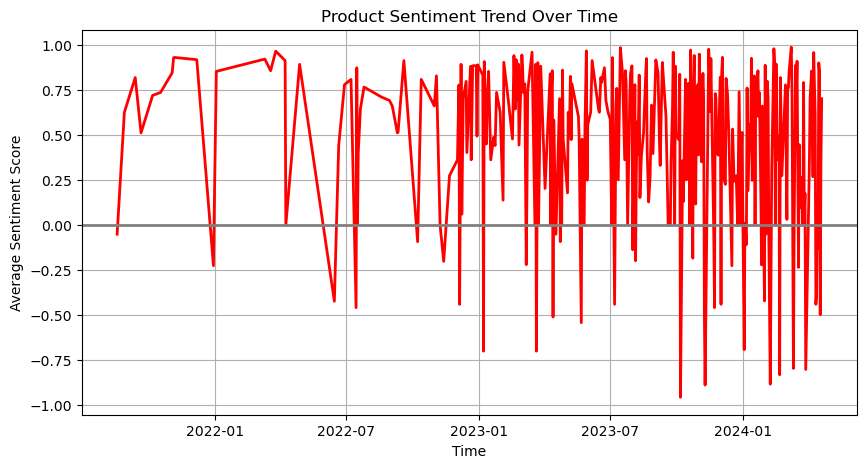

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df.sort_values('date', inplace=True)

# Aggregate the sentiment scores by date
df_aggregated = df.groupby('date')['compound_Vader'].mean().reset_index()

# Plot the trend line
plt.figure(figsize=(10, 5))
plt.plot(df_aggregated['date'], df_aggregated['compound_Vader'], marker='', color='red', linewidth=2)

# Add a horizontal line at y=0
plt.axhline(0, color='gray', linewidth=2, linestyle='-')


# Set major ticks format and locator to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6)) 

# Plot grid
plt.grid(True)

# Title and labels
plt.title('Product Sentiment Trend Over Time')
plt.xlabel('Time')
plt.ylabel('Average Sentiment Score')


plt.show()


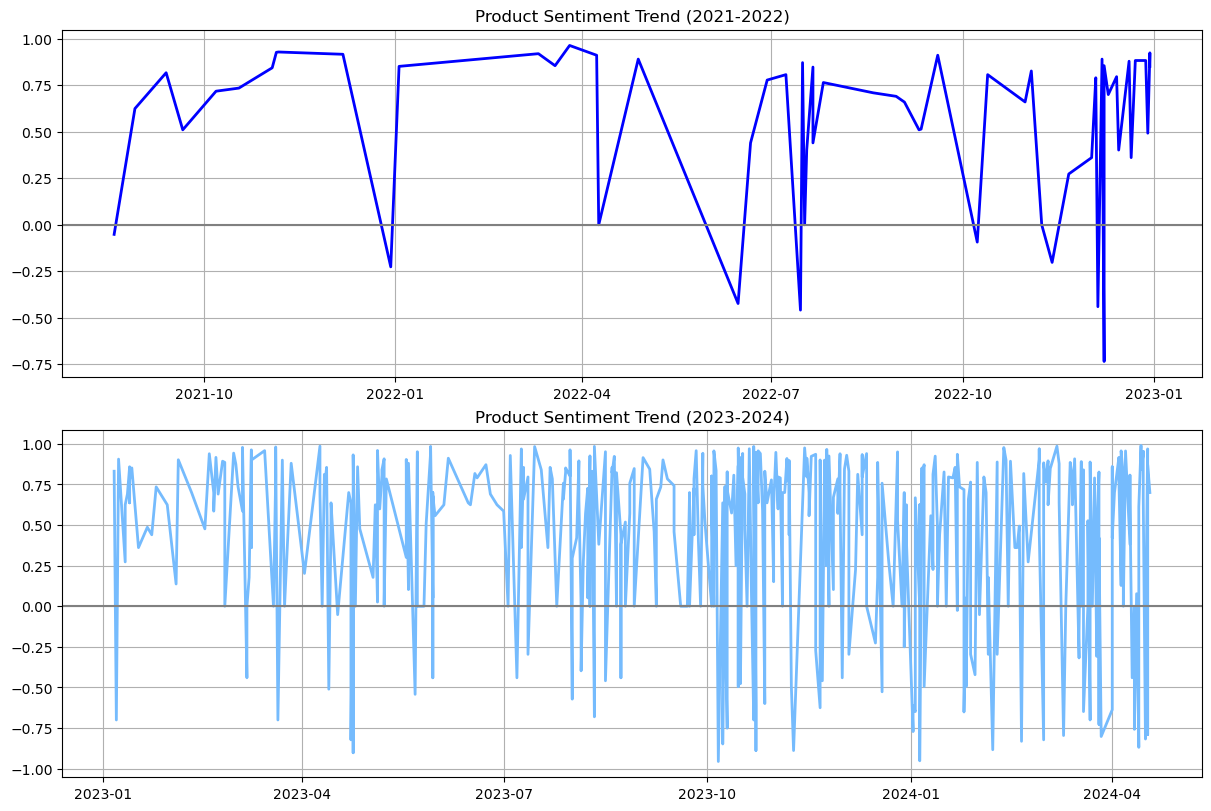

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df = df.sort_values('date')

# Split the data into two periods
df_2021_2022 = df[(df['date'] >= '2021-01-01') & (df['date'] <= '2022-12-31')]
df_2023_2024 = df[(df['date'] >= '2023-01-01') & (df['date'] <= '2024-12-31')]

# Create the plots
fig, axs = plt.subplots(2, 1, figsize=(12, 8), constrained_layout=True)

# Plot for the range 2021-2022
axs[0].plot(df_2021_2022['date'], df_2021_2022['compound_Vader'], marker='', color='blue', linewidth=2)
axs[0].axhline(0, color='gray', linewidth=1.5, linestyle='-')  # Horizontal line at y=0
axs[0].set_title('Product Sentiment Trend (2021-2022)')
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axs[0].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))  
axs[0].grid(True) 

# Plot for the range 2023-2024
axs[1].plot(df_2023_2024['date'], df_2023_2024['compound_Vader'], marker='', color='xkcd:sky blue', linewidth=2)
axs[1].axhline(0, color='gray', linewidth=1.5, linestyle='-')  # Horizontal line at y=0
axs[1].set_title('Product Sentiment Trend (2023-2024)')
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axs[1].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10))) 
axs[1].grid(True)
fig.savefig('red bull trend 2021-2022.png', transparent=True, bbox_inches='tight')

plt.show()


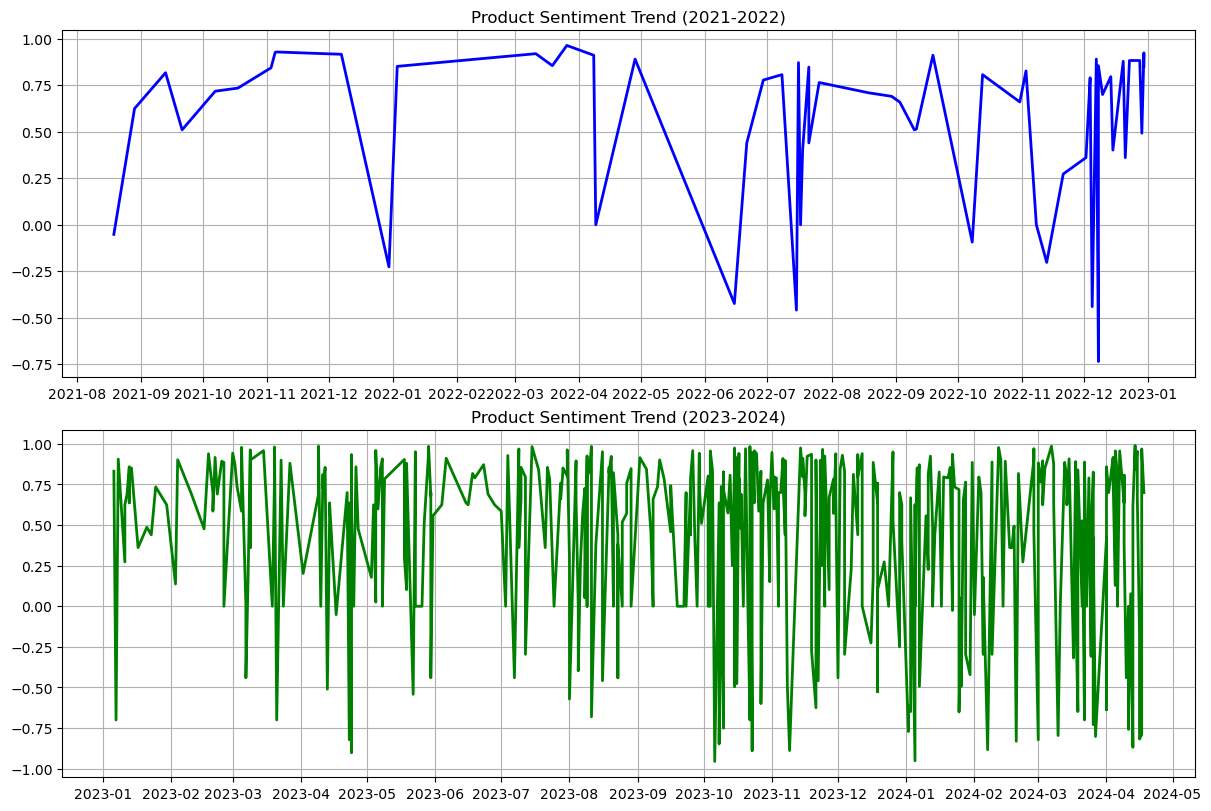

In [183]:
df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df = df.sort_values('date')

# Split the data into two periods
df_2021_2022 = df[(df['date'] >= '2021-01-01') & (df['date'] <= '2022-12-31')]
df_2023_2024 = df[(df['date'] >= '2023-01-01') & (df['date'] <= '2024-12-31')]

# Create the plots
fig, axs = plt.subplots(2, 1, figsize=(12, 8), constrained_layout=True)

# 2021-2022 Trend Line
axs[0].plot(df_2021_2022['date'], df_2021_2022['compound_Vader'], marker='', color='blue', linewidth=2)
axs[0].set_title('Product Sentiment Trend (2021-2022)')
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axs[0].xaxis.set_major_locator(mdates.MonthLocator())
axs[0].grid(True) # Optional: Add grid for better readability

# 2023-2024 Trend Line
axs[1].plot(df_2023_2024['date'], df_2023_2024['compound_Vader'], marker='', color='green', linewidth=2)
axs[1].set_title('Product Sentiment Trend (2023-2024)')
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axs[1].xaxis.set_major_locator(mdates.MonthLocator())
axs[1].grid(True) # Optional: Add grid for better readability

plt.show()

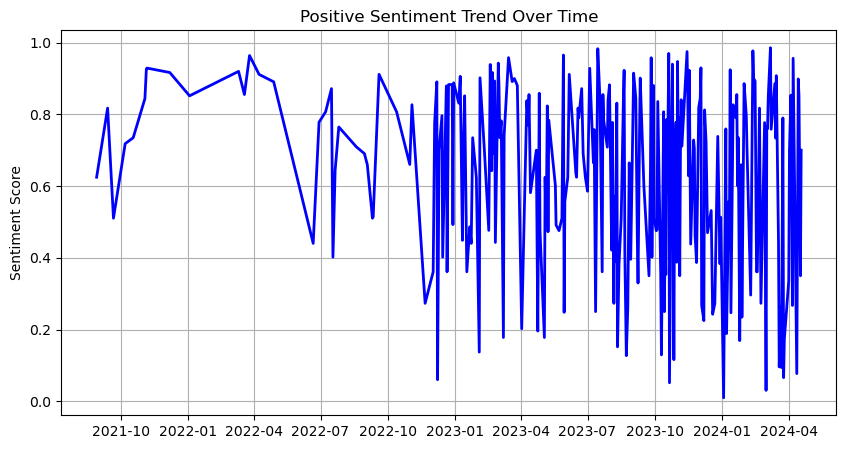

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Filter for positive sentiment scores
positive_df = df_aggregated[df_aggregated['compound_Vader'] > 0]

# Plot the positive sentiment trend line
plt.figure(figsize=(10, 5))
plt.plot(positive_df['date'], positive_df['compound_Vader'], marker='', color='blue', linewidth=2)


# Set major ticks format and locator to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10))) 

# Plot grid
plt.grid(True)

# Set axis labels and title
plt.title('Positive Sentiment Trend Over Time')
#plt.xlabel('Time')
plt.ylabel('Sentiment Score')

plt.savefig('red bull pos over year.png', transparent=True, bbox_inches='tight')

plt.show()


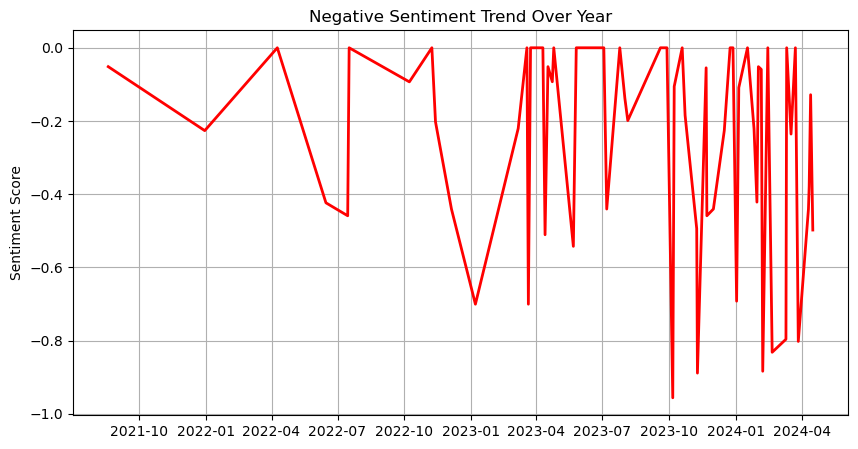

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter for positive sentiment scores
positive_df = df_aggregated[df_aggregated['compound_Vader'] <= 0]

# Plot the positive sentiment trend line
plt.figure(figsize=(10, 5))
plt.plot(positive_df['date'], positive_df['compound_Vader'], marker='', color='red', linewidth=2)

# Add a horizontal line at y=0
#plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Set major ticks format and locator to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))  

# Plot grid
plt.grid(True)

# Set axis labels and title
plt.title('Negative Sentiment Trend Over Year')
#plt.xlabel('Time')
plt.ylabel('Sentiment Score')

plt.savefig('red bull neg over year.png', transparent=True, bbox_inches='tight')

plt.show()


C:\Users\tuhon\AppData\Local\Temp\ipykernel_17368\3613045772.py:54: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


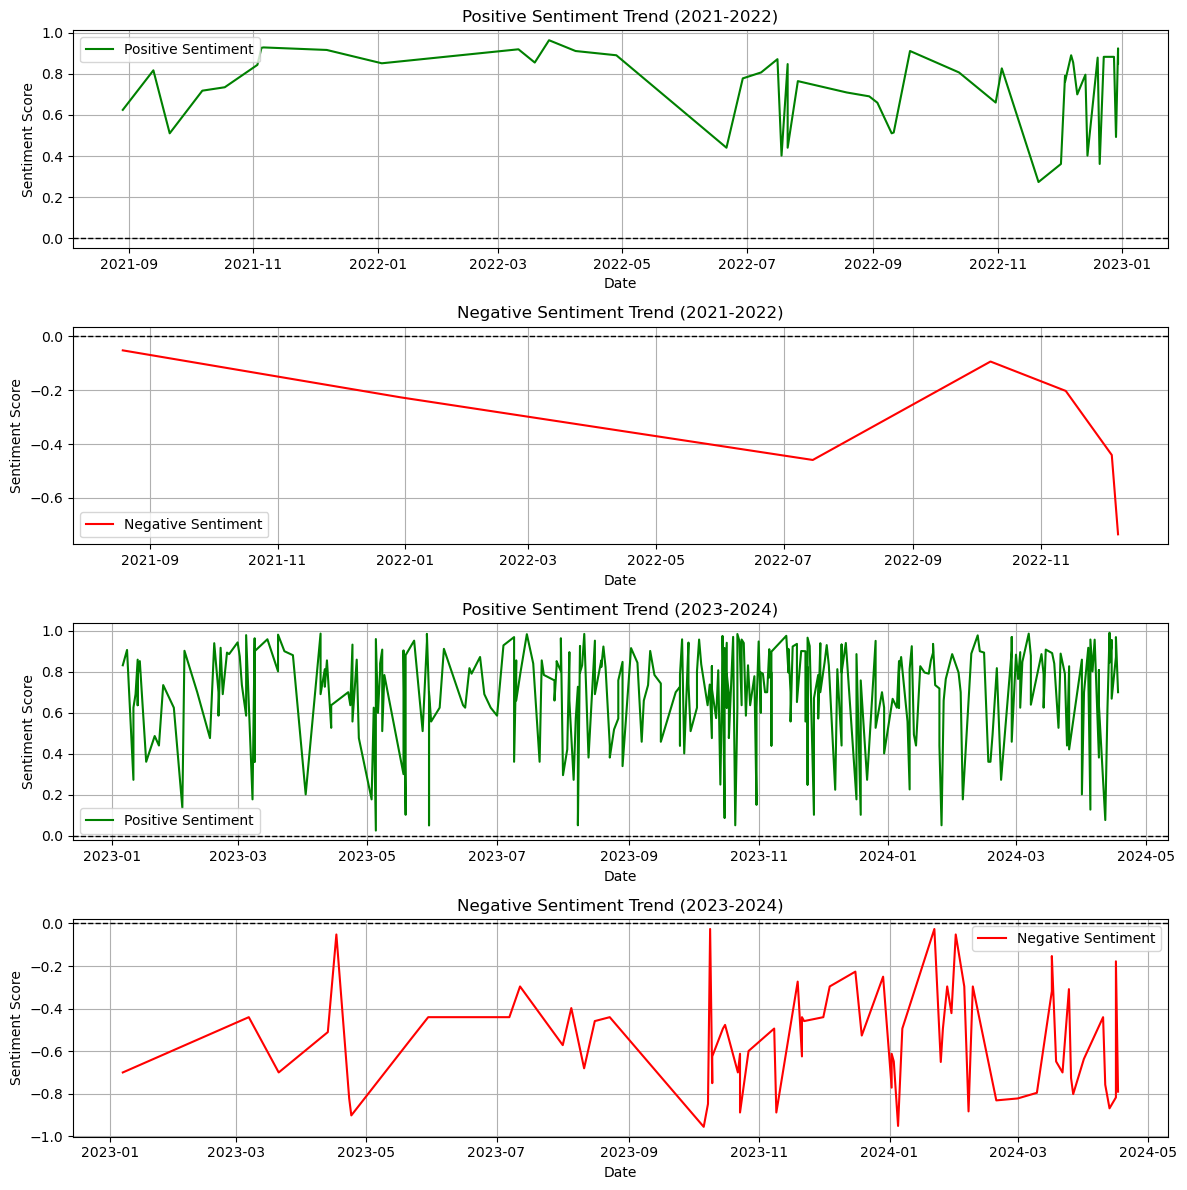

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df = df.sort_values('date')

# Split the data into two periods and further into positive and negative sentiment DataFrames
positive_df_2021_2022 = df[(df['date'].dt.year.isin([2021, 2022])) & (df['compound_Vader'] > 0)]
negative_df_2021_2022 = df[(df['date'].dt.year.isin([2021, 2022])) & (df['compound_Vader'] < 0)]
positive_df_2023_2024 = df[(df['date'].dt.year.isin([2023, 2024])) & (df['compound_Vader'] > 0)]
negative_df_2023_2024 = df[(df['date'].dt.year.isin([2023, 2024])) & (df['compound_Vader'] < 0)]

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 12), constrained_layout=True)

# Plot positive sentiment for 2021-2022
axs[0].plot(positive_df_2021_2022['date'], positive_df_2021_2022['compound_Vader'], color='green', label='Positive Sentiment')
axs[0].set_title('Positive Sentiment Trend (2021-2022)')
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Plot negative sentiment for 2021-2022
axs[1].plot(negative_df_2021_2022['date'], negative_df_2021_2022['compound_Vader'], color='red', label='Negative Sentiment')
axs[1].set_title('Negative Sentiment Trend (2021-2022)')
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Plot positive sentiment for 2023-2024
axs[2].plot(positive_df_2023_2024['date'], positive_df_2023_2024['compound_Vader'], color='green', label='Positive Sentiment')
axs[2].set_title('Positive Sentiment Trend (2023-2024)')
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Plot negative sentiment for 2023-2024
axs[3].plot(negative_df_2023_2024['date'], negative_df_2023_2024['compound_Vader'], color='red', label='Negative Sentiment')
axs[3].set_title('Negative Sentiment Trend (2023-2024)')
axs[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Set labels and add horizontal line at y=0 for all subplots
for ax in axs:
    ax.axhline(0, color='black', linewidth=1, linestyle='--')
    ax.set_xlabel('Date')
    ax.set_ylabel('Sentiment Score')
    ax.legend()
    ax.grid(True)


plt.tight_layout()
plt.show()


In [189]:
df['date']

199   2021-08-19
198   2021-08-29
197   2021-09-13
196   2021-09-21
195   2021-10-07
         ...    
2     2024-04-16
0     2024-04-17
401   2024-04-17
300   2024-04-17
400   2024-04-18
Name: date, Length: 500, dtype: datetime64[ns]

In [190]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

#my_stop_words = ['red', 'bull', 'redbull']

# Split the data into positive and negative reviews based on sentiment
positive_reviews = df[df['Vader_Sentiment'] == 1]['combined']
negative_reviews = df[df['Vader_Sentiment'] == 0]['combined']

# Define the CountVectorizer for bigrams
count_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=100) 

# Calculate BoW for positive bigrams
bow_matrix_pos = count_vectorizer.fit_transform(positive_reviews)
feature_names_pos = count_vectorizer.get_feature_names_out()
df_pos_count = pd.DataFrame(bow_matrix_pos.toarray(), columns=feature_names_pos)

# Calculate BoW for negative bigrams
count_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=100)  
feature_names_neg = count_vectorizer.get_feature_names_out()
df_neg_count = pd.DataFrame(bow_matrix_neg.toarray(), columns=feature_names_neg)

# Calculate total word frequency for positive bigrams
total_counts_pos = df_pos_count.sum(axis=0).sort_values(ascending=False).head(10)
df_top_pos = total_counts_pos.reset_index().rename(columns={'index': 'bigram', 0: 'frequency'})

# Calculate total word frequency for negative bigrams
total_counts_neg = df_neg_count.sum(axis=0).sort_values(ascending=False).head(10)
df_top_neg = total_counts_neg.reset_index().rename(columns={'index': 'bigram', 0: 'frequency'})



In [191]:
df_top_pos.to_excel('redbull_top_pos.xlsx')

In [192]:
df_top_neg.to_excel('redbull_top_neg.xlsx')

# Features, vader on feature

In [193]:
features = ['taste','value', 'leakage', 'appearance', 'flavor', 'quality', 'sugar content', 'carbs', 'calories','appearance', 'caffeine content','calories', 'motivation','price','packaging','package','brand']
def feature_presence(combined, features):
    present_features = []
    for feature in features:
        if feature in combined: 
            present_features.append(feature)
    return ', '.join(present_features)

df['features'] = df['combined'].apply(feature_presence, features=features)

# Filter out rows where no features are detected
#df = df[df['features'] != '']

df

,Unnamed: 0,product,date,rating,title,reviews,combined,sentiment,vader_scores,negscore_Vader,neuscore_Vader,posscore_Vader,compound_Vader,Vader_Sentiment,positive_compound,negative_compound,month_year,features
199,199,Amazon.com: Customer reviews: Red Bull Energy ...,2021-08-19,5.0,sugar prefect crappy feeling,thanks,sugar prefect crappy feeling thanks,1,"{'neg': 0.36, 'neu': 0.2, 'pos': 0.44, 'compou...",0.360,0.200,0.440,-0.0516,0,NaN,-0.0516,August 2021,
198,198,Amazon.com: Customer reviews: Red Bull Energy ...,2021-08-29,5.0,great product convenient delivery,see title,great product convenient delivery see title,1,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp...",0.000,0.549,0.451,0.6249,1,0.6249,NaN,August 2021,
197,197,Amazon.com: Customer reviews: Red Bull Energy ...,2021-09-13,5.0,diet please,hooked right price regular otherwise weigh thr...,diet please hooked right price regular otherwi...,1,"{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'comp...",0.000,0.776,0.224,0.8176,1,0.8176,NaN,September 2021,"taste, flavor, price"
196,196,Amazon.com: Customer reviews: Red Bull Energy ...,2021-09-21,1.0,happy,would suck like vaccum,happy would suck like vaccum,0,"{'neg': 0.261, 'neu': 0.18, 'pos': 0.559, 'com...",0.261,0.180,0.559,0.5106,1,0.5106,NaN,September 2021,
195,195,Amazon.com: Customer reviews: Red Bull Energy ...,2021-10-07,1.0,unwanted order sugar free thought,want sugar free,unwanted order sugar free thought want sugar free,0,"{'neg': 0.138, 'neu': 0.29, 'pos': 0.572, 'com...",0.138,0.290,0.572,0.7184,1,0.7184,NaN,October 2021,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2,Amazon.com: Customer reviews: Red Bull Energy ...,2024-04-16,3.0,taste seemed,tasted like reject batch flavor full typical s...,taste seemed tasted like reject batch flavor f...,0,"{'neg': 0.236, 'neu': 0.548, 'pos': 0.216, 'co...",0.236,0.548,0.216,-0.1779,0,NaN,-0.1779,April 2024,"taste, flavor, packaging"
0,0,Amazon.com: Customer reviews: Red Bull Energy ...,2024-04-17,5.0,great multipack,tastes delicious give energy coffee,great multipack tastes delicious give energy c...,1,"{'neg': 0.0, 'neu': 0.288, 'pos': 0.712, 'comp...",0.000,0.288,0.712,0.8720,1,0.8720,NaN,April 2024,taste
401,401,Amazon.com: Customer reviews: Red Bull Red Edi...,2024-04-17,5.0,red bull watermelon great chill,red bull watermelon delicious best served cold...,red bull watermelon great chill red bull water...,1,"{'neg': 0.0, 'neu': 0.361, 'pos': 0.639, 'comp...",0.000,0.361,0.639,0.9690,1,0.9690,NaN,April 2024,"taste, flavor"
300,300,Amazon.com: Customer reviews: Red Bull Energy ...,2024-04-17,1.0,keep receiving damaged product subscription,last two subscription delivery red bull pack r...,keep receiving damaged product subscription la...,0,"{'neg': 0.267, 'neu': 0.733, 'pos': 0.0, 'comp...",0.267,0.733,0.000,-0.7906,0,NaN,-0.7906,April 2024,


In [194]:
# Filter rows where 'features' is empty string or NaN or None
blank_feature_rows = df[(df['features'] == '') | (df['features'].isna()) | (df['features'].apply(lambda x: x.isspace() if isinstance(x, str) else False))]

blank_feature_rows

,Unnamed: 0,product,date,rating,title,reviews,combined,sentiment,vader_scores,negscore_Vader,neuscore_Vader,posscore_Vader,compound_Vader,Vader_Sentiment,positive_compound,negative_compound,month_year,features
199,199,Amazon.com: Customer reviews: Red Bull Energy ...,2021-08-19,5.0,sugar prefect crappy feeling,thanks,sugar prefect crappy feeling thanks,1,"{'neg': 0.36, 'neu': 0.2, 'pos': 0.44, 'compou...",0.360,0.200,0.440,-0.0516,0,NaN,-0.0516,August 2021,
198,198,Amazon.com: Customer reviews: Red Bull Energy ...,2021-08-29,5.0,great product convenient delivery,see title,great product convenient delivery see title,1,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp...",0.000,0.549,0.451,0.6249,1,0.6249,NaN,August 2021,
196,196,Amazon.com: Customer reviews: Red Bull Energy ...,2021-09-21,1.0,happy,would suck like vaccum,happy would suck like vaccum,0,"{'neg': 0.261, 'neu': 0.18, 'pos': 0.559, 'com...",0.261,0.180,0.559,0.5106,1,0.5106,NaN,September 2021,
195,195,Amazon.com: Customer reviews: Red Bull Energy ...,2021-10-07,1.0,unwanted order sugar free thought,want sugar free,unwanted order sugar free thought want sugar free,0,"{'neg': 0.138, 'neu': 0.29, 'pos': 0.572, 'com...",0.138,0.290,0.572,0.7184,1,0.7184,NaN,October 2021,
194,194,Amazon.com: Customer reviews: Red Bull Energy ...,2021-10-18,5.0,like product much,delivery person drop pack ounce can waist line...,like product much delivery person drop pack ou...,1,"{'neg': 0.071, 'neu': 0.646, 'pos': 0.282, 'co...",0.071,0.646,0.282,0.7351,1,0.7351,NaN,October 2021,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,404,Amazon.com: Customer reviews: Red Bull Red Edi...,2024-04-11,1.0,cans smashed leaking,can smashed leaking received sticky mess promi...,cans smashed leaking can smashed leaking recei...,0,"{'neg': 0.353, 'neu': 0.549, 'pos': 0.098, 'co...",0.353,0.549,0.098,-0.7579,0,NaN,-0.7579,April 2024,
5,5,Amazon.com: Customer reviews: Red Bull Energy ...,2024-04-12,5.0,yup red bull,yup red bull could want,yup red bull yup red bull could want,1,"{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp...",0.000,0.843,0.157,0.0772,1,0.0772,NaN,April 2024,
4,4,Amazon.com: Customer reviews: Red Bull Energy ...,2024-04-13,5.0,son like,son like drinking real long time,son like son like drinking real long time,1,"{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'comp...",0.000,0.545,0.455,0.6124,1,0.6124,NaN,April 2024,
300,300,Amazon.com: Customer reviews: Red Bull Energy ...,2024-04-17,1.0,keep receiving damaged product subscription,last two subscription delivery red bull pack r...,keep receiving damaged product subscription la...,0,"{'neg': 0.267, 'neu': 0.733, 'pos': 0.0, 'comp...",0.267,0.733,0.000,-0.7906,0,NaN,-0.7906,April 2024,


In [195]:
df['features'].value_counts()

features
                                          271
price                                      54
taste                                      50
flavor                                     30
package                                    17
taste, flavor                              15
taste, price                               12
packaging                                   8
flavor, price                               8
taste, flavor, price                        6
value                                       6
taste, package                              2
taste, packaging                            2
value, flavor                               2
price, package                              2
value, price                                2
taste, quality                              2
brand                                       1
taste, value, flavor                        1
quality                                     1
packaging, package                          1
taste, quality, price    

In [196]:
package_mask = df['features'].str.contains('packaging', case=False, na=False)
package_reviews = df[package_mask]
package_reviews_with_feature = package_reviews['combined']

print(package_reviews_with_feature)


391    packaging special pack tasted better bulkier s...
298    packaging cardboard packaging disinigrated pla...
438    red bull give u wing watermelon best wish pack...
70     damaged packaging product came damaged red bul...
52     good product time ordering month case time sti...
316    horrible presentation original packaging can a...
227    bummed result received product shipping packag...
225    great product subscription arrive every week l...
210            mold everywhere packaging mold inside can
302    case damaged warehouse product came damaged wa...
1      damaged opened packaging open box damaged drin...
2      taste seemed tasted like reject batch flavor f...
Name: combined, dtype: object


In [197]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk


nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

# Create masks for filtering rows that mention 'taste' or 'flavor'
mask_taste = df['features'].str.contains('taste', na=False, case=False)
mask_flavor = df['features'].str.contains('flavor', na=False, case=False)
mask_price = df['features'].str.contains('price', na=False, case=False)
mask_package = df['features'].str.contains('package', na=False, case=False)
mask_value = df['features'].str.contains('value', na=False, case=False)
mask_packaging = df['features'].str.contains('packaging', na=False, case=False)

# Filter the DataFrame based on the masks
df_taste = df[mask_taste]
df_flavor = df[mask_flavor]
df_price = df[mask_price]
df_package = df[mask_package]
df_value = df[mask_value]
df_packaging = df[mask_packaging]

def get_vader_sentiment(text):
    return sid.polarity_scores(text)['compound']

# Apply the VADER sentiment analysis function to the review text for 'taste' and 'flavor'
df_taste['sentiment_taste'] = df_taste['combined'].apply(get_vader_sentiment)
df_flavor['sentiment_flavor'] = df_flavor['combined'].apply(get_vader_sentiment)
df_taste['sentiment_price'] = df_taste['combined'].apply(get_vader_sentiment)
df_flavor['sentiment_package'] = df_flavor['combined'].apply(get_vader_sentiment)
df_taste['sentiment_value'] = df_taste['combined'].apply(get_vader_sentiment)
df_taste['sentiment_packaging'] = df_taste['combined'].apply(get_vader_sentiment)


df.loc[mask_taste, 'sentiment_taste'] = df.loc[mask_taste, 'combined'].apply(get_vader_sentiment)
df.loc[mask_flavor, 'sentiment_flavor'] = df.loc[mask_flavor, 'combined'].apply(get_vader_sentiment)
df.loc[mask_price, 'sentiment_price'] = df.loc[mask_price, 'combined'].apply(get_vader_sentiment)
df.loc[mask_package, 'sentiment_package'] = df.loc[mask_package, 'combined'].apply(get_vader_sentiment)
df.loc[mask_value, 'sentiment_value'] = df.loc[mask_value, 'combined'].apply(get_vader_sentiment)
df.loc[mask_value, 'sentiment_packaging'] = df.loc[mask_value, 'combined'].apply(get_vader_sentiment)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tuhon\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\tuhon\AppData\Local\Temp\ipykernel_17368\2131706120.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taste['sentiment_taste'] = df_taste['combined'].apply(get_vader_sentiment)
C:\Users\tuhon\AppData\Local\Temp\ipykernel_17368\2131706120.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flavor['sentiment_flavor'] = df_fla

In [198]:
df

,Unnamed: 0,product,date,rating,title,reviews,combined,sentiment,vader_scores,negscore_Vader,...,positive_compound,negative_compound,month_year,features,sentiment_taste,sentiment_flavor,sentiment_price,sentiment_package,sentiment_value,sentiment_packaging
199,199,Amazon.com: Customer reviews: Red Bull Energy ...,2021-08-19,5.0,sugar prefect crappy feeling,thanks,sugar prefect crappy feeling thanks,1,"{'neg': 0.36, 'neu': 0.2, 'pos': 0.44, 'compou...",0.360,...,NaN,-0.0516,August 2021,,NaN,NaN,NaN,NaN,NaN,NaN
198,198,Amazon.com: Customer reviews: Red Bull Energy ...,2021-08-29,5.0,great product convenient delivery,see title,great product convenient delivery see title,1,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp...",0.000,...,0.6249,NaN,August 2021,,NaN,NaN,NaN,NaN,NaN,NaN
197,197,Amazon.com: Customer reviews: Red Bull Energy ...,2021-09-13,5.0,diet please,hooked right price regular otherwise weigh thr...,diet please hooked right price regular otherwi...,1,"{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'comp...",0.000,...,0.8176,NaN,September 2021,"taste, flavor, price",0.8176,0.8176,0.8176,NaN,NaN,NaN
196,196,Amazon.com: Customer reviews: Red Bull Energy ...,2021-09-21,1.0,happy,would suck like vaccum,happy would suck like vaccum,0,"{'neg': 0.261, 'neu': 0.18, 'pos': 0.559, 'com...",0.261,...,0.5106,NaN,September 2021,,NaN,NaN,NaN,NaN,NaN,NaN
195,195,Amazon.com: Customer reviews: Red Bull Energy ...,2021-10-07,1.0,unwanted order sugar free thought,want sugar free,unwanted order sugar free thought want sugar free,0,"{'neg': 0.138, 'neu': 0.29, 'pos': 0.572, 'com...",0.138,...,0.7184,NaN,October 2021,,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2,Amazon.com: Customer reviews: Red Bull Energy ...,2024-04-16,3.0,taste seemed,tasted like reject batch flavor full typical s...,taste seemed tasted like reject batch flavor f...,0,"{'neg': 0.236, 'neu': 0.548, 'pos': 0.216, 'co...",0.236,...,NaN,-0.1779,April 2024,"taste, flavor, packaging",-0.1779,-0.1779,NaN,NaN,NaN,NaN
0,0,Amazon.com: Customer reviews: Red Bull Energy ...,2024-04-17,5.0,great multipack,tastes delicious give energy coffee,great multipack tastes delicious give energy c...,1,"{'neg': 0.0, 'neu': 0.288, 'pos': 0.712, 'comp...",0.000,...,0.8720,NaN,April 2024,taste,0.8720,NaN,NaN,NaN,NaN,NaN
401,401,Amazon.com: Customer reviews: Red Bull Red Edi...,2024-04-17,5.0,red bull watermelon great chill,red bull watermelon delicious best served cold...,red bull watermelon great chill red bull water...,1,"{'neg': 0.0, 'neu': 0.361, 'pos': 0.639, 'comp...",0.000,...,0.9690,NaN,April 2024,"taste, flavor",0.9690,0.9690,NaN,NaN,NaN,NaN
300,300,Amazon.com: Customer reviews: Red Bull Energy ...,2024-04-17,1.0,keep receiving damaged product subscription,last two subscription delivery red bull pack r...,keep receiving damaged product subscription la...,0,"{'neg': 0.267, 'neu': 0.733, 'pos': 0.0, 'comp...",0.267,...,NaN,-0.7906,April 2024,,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
df[['product', 'date', 'rating', 'title', 'reviews', 'combined', 'sentiment', 'sentiment_taste', 'sentiment_flavor','sentiment_price','sentiment_package','sentiment_value','sentiment_packaging']].to_csv('feature red bull.csv')


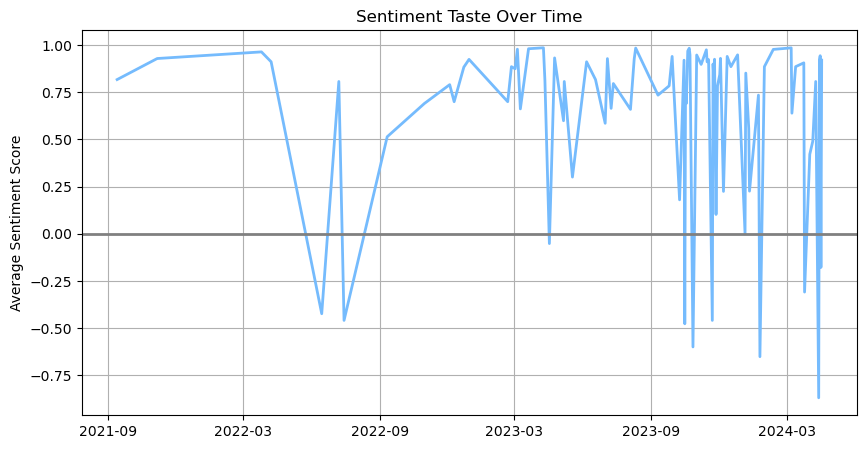

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df.sort_values('date', inplace=True)

# Filter out rows where 'sentiment_taste' is NaN
df_taste_not_null = df[df['sentiment_taste'].notna()]

# Aggregate the non-NaN sentiment scores by date.
df_aggregated = df_taste_not_null.groupby('date')['sentiment_taste'].mean().reset_index()

# Plot the trend line for 'sentiment_taste'
plt.figure(figsize=(10, 5))
plt.plot(df_aggregated['date'], df_aggregated['sentiment_taste'], marker='', color='xkcd:sky blue', linewidth=2)

# Add a horizontal line at y=0
plt.axhline(0, color='gray', linewidth=2, linestyle='-')

# Set major ticks format and locator to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  
# Plot grid
plt.grid(True)

# Title and labels
plt.title('Sentiment Taste Over Time')
plt.ylabel('Average Sentiment Score')

plt.savefig('red bull taste over year.png', transparent=True, bbox_inches='tight')
plt.show()


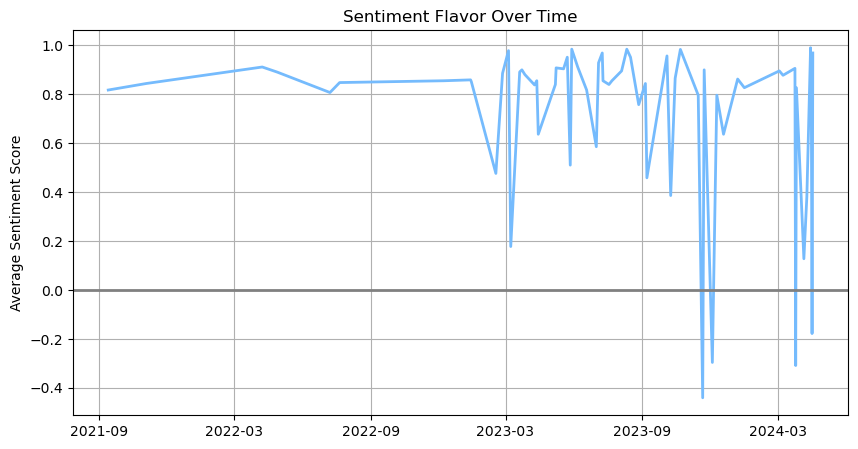

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df.sort_values('date', inplace=True)

# Filter out rows where 'sentiment_taste' is NaN
df_taste_not_null = df[df['sentiment_flavor'].notna()]

# Aggregate the non-NaN sentiment scores by date.
df_aggregated = df_taste_not_null.groupby('date')['sentiment_flavor'].mean().reset_index()

# Plot the trend line for 'sentiment_taste'
plt.figure(figsize=(10, 5))
plt.plot(df_aggregated['date'], df_aggregated['sentiment_flavor'], marker='', color='xkcd:sky blue', linewidth=2)

# Add a horizontal line at y=0
plt.axhline(0, color='gray', linewidth=2, linestyle='-')

# Set major ticks format and locator to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  

# Plot grid
plt.grid(True)

# Title and labels
plt.title('Sentiment Flavor Over Time')
plt.ylabel('Average Sentiment Score')

plt.savefig('red bull flavor over year.png', transparent=True, bbox_inches='tight')
plt.show()


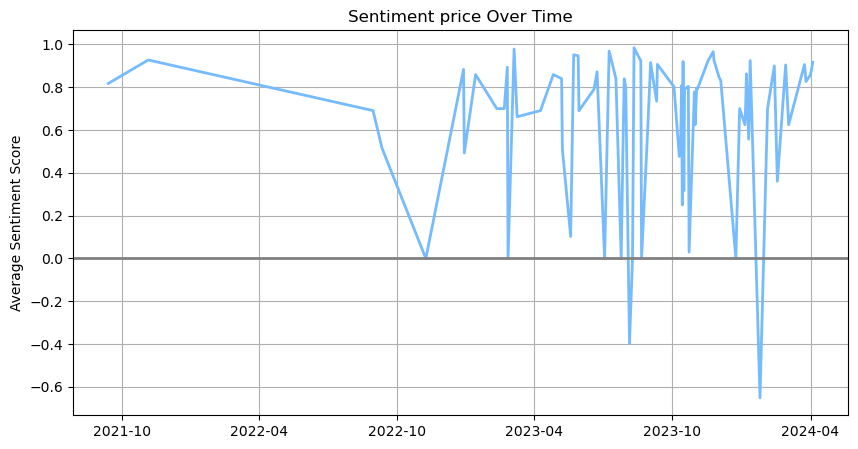

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df.sort_values('date', inplace=True)

# Filter out rows where 'sentiment_taste' is NaN
df_taste_not_null = df[df['sentiment_price'].notna()]

# Aggregate the non-NaN sentiment scores by date.
df_aggregated = df_taste_not_null.groupby('date')['sentiment_price'].mean().reset_index()

# Plot the trend line for 'sentiment_taste'
plt.figure(figsize=(10, 5))
plt.plot(df_aggregated['date'], df_aggregated['sentiment_price'], marker='', color='xkcd:sky blue', linewidth=2)

# Add a horizontal line at y=0
plt.axhline(0, color='gray', linewidth=2, linestyle='-')

# Set major ticks format and locator to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  

# Plot grid
plt.grid(True)

# Title and labels
plt.title('Sentiment price Over Time')
plt.ylabel('Average Sentiment Score')

plt.savefig('red bull price over year.png', transparent=True, bbox_inches='tight')
plt.show()


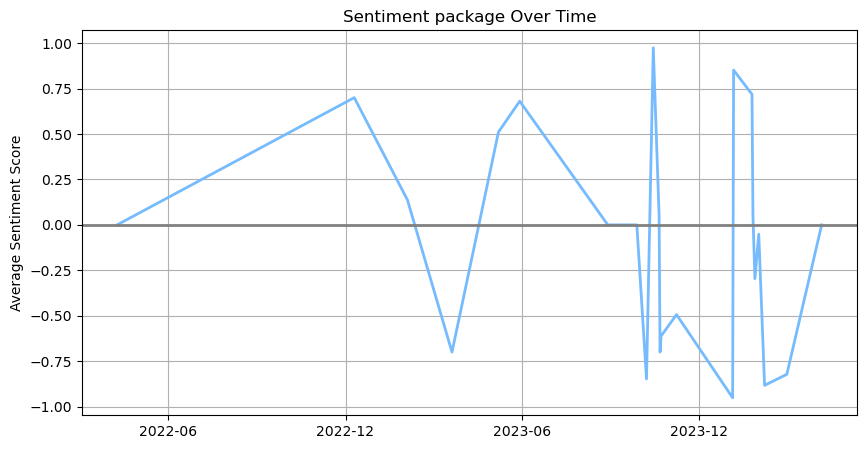

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df.sort_values('date', inplace=True)

# Filter out rows where 'sentiment_taste' is NaN
df_taste_not_null = df[df['sentiment_package'].notna()]

# Aggregate the non-NaN sentiment scores by date.
df_aggregated = df_taste_not_null.groupby('date')['sentiment_package'].mean().reset_index()

# Plot the trend line for 'sentiment_taste'
plt.figure(figsize=(10, 5))
plt.plot(df_aggregated['date'], df_aggregated['sentiment_package'], marker='', color='xkcd:sky blue', linewidth=2)

# Add a horizontal line at y=0
plt.axhline(0, color='gray', linewidth=2, linestyle='-')

# Set major ticks format and locator to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6)) 
# Plot grid
plt.grid(True)

# Title and labels
plt.title('Sentiment package Over Time')
plt.ylabel('Average Sentiment Score')


# Show the plot
plt.show()


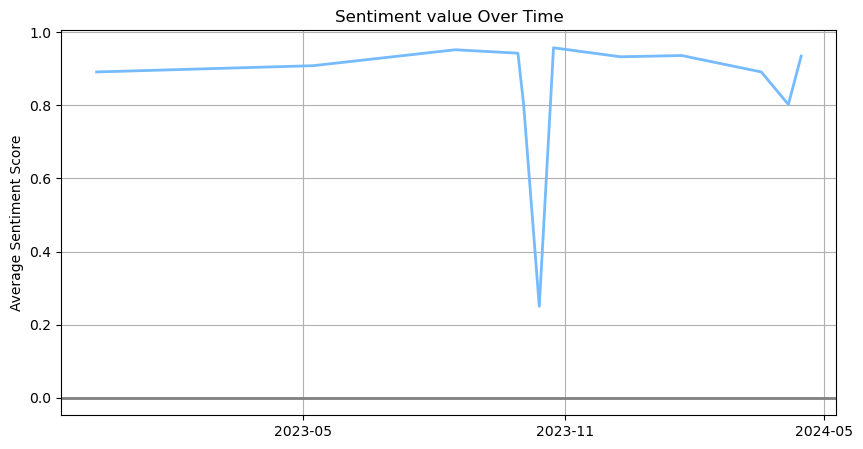

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by the 'date' column
df.sort_values('date', inplace=True)

# Filter out rows where 'sentiment_taste' is NaN
df_taste_not_null = df[df['sentiment_value'].notna()]

# Aggregate the non-NaN sentiment scores by date.
df_aggregated = df_taste_not_null.groupby('date')['sentiment_value'].mean().reset_index()

# Plot the trend line for 'sentiment_taste'
plt.figure(figsize=(10, 5))
plt.plot(df_aggregated['date'], df_aggregated['sentiment_value'], marker='', color='xkcd:sky blue', linewidth=2)

# Add a horizontal line at y=0
plt.axhline(0, color='gray', linewidth=2, linestyle='-')

# Set major ticks format and locator to show only month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  

# Plot grid
plt.grid(True)

# Title and labels
plt.title('Sentiment value Over Time')
plt.ylabel('Average Sentiment Score')

plt.savefig('red bull value over year.png', transparent=True, bbox_inches='tight')
plt.show()


In [205]:
features = ['taste','value', 'leakage', 'appearance', 'flavor', 'quality', 'sugar content', 'carbs', 'calories','appearance', 'caffeine content','calories', 'motivation']
columns_to_average = ['negscore_Vader', 'neuscore_Vader', 'posscore_Vader', 'compound_Vader']

# Initialize a new DataFrame to store the average sentiment for each feature
df_feature_avgs = pd.DataFrame(index=features, columns=columns_to_average)

# For each feature, filter messages containing that feature and calculate average sentiment scores
for feature in features:
    messages_with_feature = df[df['combined'].str.contains(feature, case=False, na=False)]
    for column in columns_to_average:
        df_feature_avgs.at[feature, column] = messages_with_feature[column].mean()

df_feature_avgs.reset_index(inplace=True)
df_feature_avgs.rename(columns={'index': 'Feature'}, inplace=True)

df_feature_avgs

,Feature,negscore_Vader,neuscore_Vader,posscore_Vader,compound_Vader
0,taste,0.061021,0.488653,0.450316,0.6536
1,value,0.019083,0.358917,0.622083,0.849825
2,leakage,NaN,NaN,NaN,NaN
3,appearance,NaN,NaN,NaN,NaN
4,flavor,0.056754,0.471046,0.472231,0.743205
5,quality,0.213,0.4262,0.3608,0.22628
6,sugar content,NaN,NaN,NaN,NaN
7,carbs,NaN,NaN,NaN,NaN
8,calories,NaN,NaN,NaN,NaN
9,appearance,NaN,NaN,NaN,NaN


In [206]:
feature_df = df[['product', 'date', 'rating', 'title', 'reviews', 'combined', 'sentiment_price', 'sentiment_taste', 'sentiment_flavor', 'sentiment_package', 'sentiment_value']]
feature_df 

,product,date,rating,title,reviews,combined,sentiment_price,sentiment_taste,sentiment_flavor,sentiment_package,sentiment_value
199,Amazon.com: Customer reviews: Red Bull Energy ...,2021-08-19,5.0,sugar prefect crappy feeling,thanks,sugar prefect crappy feeling thanks,NaN,NaN,NaN,NaN,NaN
198,Amazon.com: Customer reviews: Red Bull Energy ...,2021-08-29,5.0,great product convenient delivery,see title,great product convenient delivery see title,NaN,NaN,NaN,NaN,NaN
197,Amazon.com: Customer reviews: Red Bull Energy ...,2021-09-13,5.0,diet please,hooked right price regular otherwise weigh thr...,diet please hooked right price regular otherwi...,0.8176,0.8176,0.8176,NaN,NaN
196,Amazon.com: Customer reviews: Red Bull Energy ...,2021-09-21,1.0,happy,would suck like vaccum,happy would suck like vaccum,NaN,NaN,NaN,NaN,NaN
195,Amazon.com: Customer reviews: Red Bull Energy ...,2021-10-07,1.0,unwanted order sugar free thought,want sugar free,unwanted order sugar free thought want sugar free,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1,Amazon.com: Customer reviews: Red Bull Energy ...,2024-04-16,1.0,damaged opened,packaging open box damaged drink falling packa...,damaged opened packaging open box damaged drin...,NaN,NaN,NaN,NaN,NaN
300,Amazon.com: Customer reviews: Red Bull Energy ...,2024-04-17,1.0,keep receiving damaged product subscription,last two subscription delivery red bull pack r...,keep receiving damaged product subscription la...,NaN,NaN,NaN,NaN,NaN
0,Amazon.com: Customer reviews: Red Bull Energy ...,2024-04-17,5.0,great multipack,tastes delicious give energy coffee,great multipack tastes delicious give energy c...,NaN,0.8720,NaN,NaN,NaN
401,Amazon.com: Customer reviews: Red Bull Red Edi...,2024-04-17,5.0,red bull watermelon great chill,red bull watermelon delicious best served cold...,red bull watermelon great chill red bull water...,NaN,0.9690,0.9690,NaN,NaN


In [207]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import pandas as pd

positive_reviews_price = feature_df[df['sentiment_price'] > 0.05]['combined']
negative_reviews_price = feature_df[df['sentiment_price'] > 0.05]['combined']

#Define the vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=100)  

# Calculate TF-IDF for positive reviews
tfidf_matrix_pos = tfidf_vectorizer.fit_transform(positive_reviews_price)
feature_names_pos = tfidf_vectorizer.get_feature_names_out()
df_pos_tfidf = pd.DataFrame(tfidf_matrix_pos.toarray(), columns=feature_names_pos)

# Calculate TF-IDF for negative reviews
tfidf_vectorizer = TfidfVectorizer(max_features=100)  
tfidf_matrix_neg = tfidf_vectorizer.fit_transform(negative_reviews_price)
feature_names_neg = tfidf_vectorizer.get_feature_names_out()
df_neg_tfidf = pd.DataFrame(tfidf_matrix_neg.toarray(), columns=feature_names_neg)

# Calculate frequency of each word
word_counts_pos = np.asarray(tfidf_matrix_pos.sum(axis=0)).ravel().tolist()
df_pos_frequency = pd.DataFrame({'term': feature_names_pos, 'frequency': word_counts_pos})
word_counts_neg = np.asarray(tfidf_matrix_neg.sum(axis=0)).ravel().tolist()
df_neg_frequency = pd.DataFrame({'term': feature_names_neg, 'frequency': word_counts_neg})

# Combine TF-IDF with frequency for the positive reviews
df_pos = pd.DataFrame(df_pos_tfidf.mean(), columns=['tfidf'])
df_pos['frequency'] = df_pos_frequency['frequency']

# Combine TF-IDF with frequency for the negative reviews
df_neg = pd.DataFrame(df_neg_tfidf.mean(), columns=['tfidf'])
df_neg['frequency'] = df_neg_frequency['frequency']

# Sort by TF-IDF scores to get top keywords
top_n = 10  
top_keywords_pos = df_pos.sort_values(by='tfidf', ascending=False).head(top_n)
top_keywords_neg = df_neg.sort_values(by='tfidf', ascending=False).head(top_n)



In [208]:
top_keywords_pos

,tfidf,frequency
price,0.158038,NaN
great,0.136750,NaN
good,0.123004,NaN
red,0.079995,NaN
bull,0.078027,NaN
store,0.070097,NaN
drink,0.062070,NaN
taste,0.056223,NaN
like,0.055425,NaN
redbull,0.052504,NaN


In [209]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


# Split the data into positive and negative reviews based on sentiment
positive_reviews_price = df[df['sentiment_price'] > 0.05]['combined']
negative_reviews_price = df[df['sentiment_price'] <= 0.05]['combined']

# Define the CountVectorizer
count_vectorizer = CountVectorizer(max_features=100)  

# Calculate BoW for positive reviews
bow_matrix_pos_price = count_vectorizer.fit_transform(positive_reviews_price)
feature_names_pos_price = count_vectorizer.get_feature_names_out()
df_pos_count_price = pd.DataFrame(bow_matrix_pos_price.toarray(), columns=feature_names_pos_price)

# Calculate BoW for negative reviews
count_vectorizer = CountVectorizer(max_features=100)  
bow_matrix_neg_price = count_vectorizer.fit_transform(negative_reviews_price)
feature_names_neg_price = count_vectorizer.get_feature_names_out()
df_neg_count_price = pd.DataFrame(bow_matrix_neg_price.toarray(), columns=feature_names_neg_price)

# Calculate total word frequency for positive reviews
total_counts_pos_price = df_pos_count_price.sum(axis=0).sort_values(ascending=False).head(10)
df_top_pos_price = total_counts_pos_price.reset_index().rename(columns={'index': 'term', 0: 'frequency'})

# Calculate total word frequency for negative reviews
total_counts_neg_price = df_neg_count_price.sum(axis=0).sort_values(ascending=False).head(10)
df_top_neg_price = total_counts_neg_price.reset_index().rename(columns={'index': 'term', 0: 'frequency'})



In [210]:
total_counts_pos_price 
df_top_pos_price 


,term,frequency
0,price,90
1,great,43
2,red,32
3,bull,31
4,good,27
5,energy,25
6,drink,24
7,taste,20
8,flavor,19
9,love,17


In [211]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

my_stop_words = ['red bull', 'price']

# Split the data into positive and negative reviews based on sentiment
positive_reviews = df[df['sentiment_price'] > 0]['combined']
negative_reviews = df[df['sentiment_price'] < 0.05]['combined']

# Define the CountVectorizer for bigrams
count_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=100, stop_words=my_stop_words)  

# Calculate BoW for positive bigrams
bow_matrix_pos = count_vectorizer.fit_transform(positive_reviews)
feature_names_pos = count_vectorizer.get_feature_names_out()
df_pos_count = pd.DataFrame(bow_matrix_pos.toarray(), columns=feature_names_pos)

# Calculate BoW for negative bigrams
count_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=100, stop_words=my_stop_words)  
bow_matrix_neg = count_vectorizer.fit_transform(negative_reviews)
feature_names_neg = count_vectorizer.get_feature_names_out()
df_neg_count = pd.DataFrame(bow_matrix_neg.toarray(), columns=feature_names_neg)

# Calculate total word frequency for positive bigrams
total_counts_pos = df_pos_count.sum(axis=0).sort_values(ascending=False).head(10)
df_top_pos_bigrams = total_counts_pos.reset_index().rename(columns={'index': 'bigram', 0: 'frequency'})

# Calculate total word frequency for negative bigrams
total_counts_neg = df_neg_count.sum(axis=0).sort_values(ascending=False).head(10)
df_top_neg_bigrams = total_counts_neg.reset_index().rename(columns={'index': 'bigram', 0: 'frequency'})



C:\Users\tuhon\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bull', 'red'] not in stop_words.
  warnings.warn(
C:\Users\tuhon\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bull', 'red'] not in stop_words.
  warnings.warn(


In [212]:
df_top_neg_bigrams

,bigram,frequency
0,shipping cheap,2
1,red bull,2
2,fast shipping,2
3,given bigger,1
4,giving product,1
5,go could,1
6,go higher,1
7,got daughter,1
8,high got,1
9,personally think,1


In [213]:
df_top_pos_bigrams

,bigram,frequency
0,red bull,31
1,energy drink,15
2,sugar free,4
3,great great,4
4,great deal,4
5,good deal,4
6,love watermelon,4
7,great taste,4
8,bull great,3
9,love redbull,3


In [214]:
import re
from nltk.corpus import wordnet as wn
nltk.download('wordnet')

# Get synonyms for the features
def get_synonyms(word):
    synonyms = set()
    for synset in wn.synsets(word):
        for lemma in synset.lemmas():
            synonyms.add(lemma.name().replace('_', ' '))
    return synonyms

# Create a dictionary to store each feature and its synonyms
feature_synonyms = {feature: get_synonyms(feature) for feature in features}

# Update the filtering function to also filter out features and their synonyms
def filter_messages_by_feature_synonyms(df, feature_synonyms):
    # Initialize an empty DataFrame for each feature
    df_feature_avgs = pd.DataFrame(index=feature_synonyms.keys(), columns=columns_to_average)
    
    # For each feature and its synonyms, filter messages and calculate the average sentiment scores
    for feature, synonyms in feature_synonyms.items():
        # Create a regular expression to match the feature or any of its synonyms
        regex_pattern = '|'.join(map(re.escape, synonyms))
        sentences_with_feature = df[df['combined'].str.contains(regex_pattern, case=False, na=False)]
        for column in columns_to_average:
            df_feature_avgs.at[feature, column] = sentences_with_feature[column].mean()
    
    df_feature_avgs.reset_index(inplace=True)
    df_feature_avgs.rename(columns={'index': 'Feature'}, inplace=True)
    return df_feature_avgs

# Apply the filtering function
df_feature_avgs = filter_messages_by_feature_synonyms(df, feature_synonyms)
df_feature_avgs

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tuhon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Feature,negscore_Vader,neuscore_Vader,posscore_Vader,compound_Vader
0,taste,0.063269,0.47976,0.456952,0.66489
1,value,0.055824,0.430294,0.514059,0.766353
2,leakage,0.263727,0.604909,0.131455,-0.1598
3,appearance,0.19475,0.62825,0.177,0.06045
4,flavor,0.070313,0.482096,0.447614,0.683778
5,quality,0.105867,0.551467,0.3426,0.57606
6,sugar content,0.080566,0.513376,0.404058,0.455156
7,carbs,0.080566,0.513376,0.404058,0.455156
8,calories,0.051667,0.669,0.279,0.7265
9,caffeine content,0.080566,0.513376,0.404058,0.455156


In [92]:
feature_synonyms

{'taste': {'appreciation',
  'discernment',
  'gustation',
  'gustatory modality',
  'gustatory perception',
  'gustatory sensation',
  'mouthful',
  'penchant',
  'perceptiveness',
  'predilection',
  'preference',
  'sample',
  'savor',
  'savour',
  'sense of taste',
  'smack',
  'taste',
  'taste perception',
  'taste sensation',
  'tasting',
  'try',
  'try out'},
 'value': {'appraise',
  'appreciate',
  'assess',
  'economic value',
  'esteem',
  'evaluate',
  'measure',
  'note value',
  'prise',
  'prize',
  'rate',
  'respect',
  'time value',
  'treasure',
  'valuate',
  'value'},
 'leakage': {'escape', 'leak', 'leakage', 'outflow'},
 'appearance': {'appearance',
  'appearing',
  'coming into court',
  'show',
  'visual aspect'},
 'flavor': {'feel',
  'feeling',
  'flavor',
  'flavour',
  'look',
  'nip',
  'relish',
  'sapidity',
  'savor',
  'savour',
  'season',
  'smack',
  'smell',
  'spirit',
  'tang',
  'tone'},
 'quality': {'caliber',
  'calibre',
  'character',
  'ch